# Работа с csv

Результаты в красивой форме: https://archiveofourown.org/works/41330793/chapters/103634001

## ID:full txt

In [1]:
with open (r"C:\Users\melib\Downloads\bored.csv") as bored:
    dict1 = {}
    for line in bored:
        h = line.split('"')
        
        if (line[1].isdigit() == True and line[2].find(".") < 0 and line.find("Punk!") < 0):
            dot = line.split(",")[0].replace('"', "")
            dict1["work_"+dot] = ""
        else:
            dict1["work_"+dot] += line.strip()
        
dict1

{'work_40717614': ';Okay, that\'s enough. That\'s enough. Alan has calmed down abruptly. Breathe in, breathe out, one-mississippi, two-mississippi, and:;;"- Nothing. I won\'t bother your employee again. Good-bye,"""" to Rowan, while he looks on with that smug, triumphant look, """"Sorry to bother you,"""" to the customer who seems to have gotten into character and isn\'t going to stop this charade.";;"Well, I can continue the game. Turn around and leave the playtech. Walk out of the store, get in the car. Drive away. Before I change my mind. Till I remember that I\'m an adult or I choose to be an adult and put things back the way they were. No way anymore. Since Rowan doesn\'t care who exactly is wearing the red shirt, and this customer took the money, let him work for a day or two. More precisely... a week. Yes, that\'s right, two hundred bucks I\'ll get for about a week\'s work, so let that be a little rest. After so much taunting and bullying, I definitely deserve an unscheduled vac

# Варим суп

In [2]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib import pyplot
sb.set_theme(style="whitegrid", palette=None)

## кипятим

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
def url_soup(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    wig = soup.find("ol",class_="work index group")
    def parcer(soup):
        id = {"id": soup.get("id")}

        title = {"title": soup.find("a").text}

        author = {"author": soup.find_all("a")[1].text}

        tags = {}
        tag_list2 = soup.find(class_= "stats").find_all("dd")#значение
        tags_list22 = [el.text for el in tag_list2]
        tag_list3 = soup.find(class_= "stats").find_all("dt")#ключ
        tags_list33 = [ell.text for ell in tag_list3] 
        tags = dict(zip(tags_list33, tags_list22))

        rel = soup.find(class_= "tags commas").find_all(class_="relationships")
        rel = [eol.text for eol in rel]
        rel_dict = {"relationships":rel}

        char = soup.find(class_= "tags commas").find_all(class_="characters")
        char = [eol1.text for eol1 in char]
        char_dict = {"characters":char}

        freef = soup.find(class_= "tags commas").find_all(class_="freeforms")
        freef = [eol1.text for eol1 in freef]
        freef_dict = {"tags_add": freef}

        combi = id |  author | title | tags| rel_dict | char_dict| freef_dict 
        return combi
    new1 = []
    for item1 in wig:
        if len(item1) > 2:
            new1.append(parcer(item1))
    new1
    return new1

In [5]:
y = url_soup("https://archiveofourown.org/tags/Bored%20(Web%20Series)/works?page=2")
y1 = url_soup("https://archiveofourown.org/tags/Bored%20(Web%20Series)/works")
new1 = y + y1

# Делаем табличку

In [6]:
    itog = []
    cnt = -1
    for ci, vi in dict1.items():
        for element in new1:
            for ki, wi in element.items():
                if ci == wi:
                    cnt += 1
                    itog.append(dict())
                    itog[cnt][ki] = wi
                    itog[cnt]["full_text"] = vi
                    itog[cnt] = element | itog[cnt] 
                    
    len(itog)


22

и наконец...

In [7]:
df = pd.DataFrame(itog)
df

id                  author  \
0   work_40717614                melibrun   
1   work_39345489                A_square   
2   work_39200592  Baelins Rod (Hummelpo)   
3   work_36631768                A_square   
4   work_38353909  Baelins Rod (Hummelpo)   
5   work_37915759                A_square   
6   work_37878532  Baelins Rod (Hummelpo)   
7   work_37560283  Baelins Rod (Hummelpo)   
8   work_37419091  Baelins Rod (Hummelpo)   
9   work_37124503  Baelins Rod (Hummelpo)   
10  work_37093465  Baelins Rod (Hummelpo)   
11  work_37006072              PlikPlik23   
12  work_36970639  Baelins Rod (Hummelpo)   
13  work_36933667        Argo (RetroDuck)   
14  work_36932701        Argo (RetroDuck)   
15  work_36905911  Baelins Rod (Hummelpo)   
16  work_35945272                A_square   
17  work_35659282                A_square   
18  work_34926301                   Fault   
19  work_32044834                   Fault   
20  work_31522973                   Fault   
21  work_27261451               q98775258   

                                               title  Language:  Words:  \
0                   One-mississippi, two-mississippi    English   1,829   
1                                        Locked Down    English   4,173   
2   I'll be your teacher, I'll show you the ropes...    English  11,340   
3                                  Not Bored Anymore    English  22,586   
4             Four peasants on a dead man's chest...    English  11,637   
5                                          Annoyance    English   2,716   
6                                         "Whiplash"    English   2,812   
7                             Learn to love again...    English   5,668   
8                               When I First Met You    English   6,495   
9                       ❤️Will you be my Alantine?❤️    English   2,816   
10                                      Give Or Take    English   5,593   
11                     VLDL: Epilogues and Addendums    English     236   
12                                  The White Menace    English   7,802   
13                                     Under control    English   1,085   
14                                     Под контролем    Русский     907   
15                           A Bored Christmas Carol    English  15,185   
16                                   Merry Christmas    English   9,577   
17                                    Borrowing Pens    English     605   
18                   The Janitor in the Shelobratory    English   1,438   
19                                The Taika Takeover    English   7,082   
20                Keanu Reeves,  Playtech consultant    English   7,725   
21                                             饮酒需适量  中文-普通话 國語   2,904   

   Chapters: Comments: Kudos: Hits:  \
0        3/3         4      4    39   
1        2/2       NaN      6   168   
2        5/5         8     10   245   
3      15/15        21     18   458   
4        6/6         2      9    90   
5        2/2       NaN      6   167   
6        1/1       NaN      7   219   
7        3/3         8     12   119   
8        3/3         6      8   116   
9        1/1         7     10    72   
10       2/2         8     10   212   
11       1/1         1     14    83   
12       4/4       NaN      8   130   
13       1/1         1      9    97   
14       1/1       NaN      3    24   
15       7/7         5     16   186   
16       2/2       NaN      8   144   
17       1/1       NaN     10   152   
18       1/1       NaN      2    16   
19      9/69         6      4    64   
20       7/7         2      4   111   
21       1/1         6     11   180   

                                        relationships  \
0                      [Alan (Bored) / Rowan (Bored)]   
1                      [Alan (Bored) / Rowan (Bored)]   
2   [Alan (Bored)/Rowan (Bored), Alan (Bored)/Rob ...   
3                        [Alan (Bored)/Rowan (Bored)]   
4                        [Rowan (Bored)/Alan (Bored)]   
5   [Alan (Bo

## преобразовываем цифры в цифры

In [8]:
df = df.fillna(0)
df['Words:'] = pd.to_numeric(df['Words:'].str.replace(',', ''))
df['Words:'] = df["Words:"].astype('int64')
df['Kudos:'] = df["Kudos:"].astype('int64')
df['Hits:'] = df["Hits:"].astype('int64')
df['Comments:'] = df["Comments:"].astype('int64')
df['Bookmarks:'] = df["Bookmarks:"].astype('int64')

## буквы в буквы

In [9]:
df['characters'] = df["characters"].apply(",".join).str.replace("(Bored)","")
df["relationships"] = df["relationships"].apply(",".join).str.replace("(Bored)","")

df["relationships"] = df["relationships"].str.replace('Web series',"")
df['characters'] = df["characters"].str.replace('Web series',"")
df["relationships"] = df["relationships"].str.replace('[(+*)]','', regex=True)
df['characters'] = df["characters"].str.replace('[(+*)]',',', regex=True)
df['characters'] = df["characters"].str.replace(" ","")
df['characters'] = df["characters"].str.replace(",,,",",")
df["relationships"] = df["relationships"].str.replace(" ","")

df['characters'] = df['characters'].apply(lambda x: x.split(','))
df["relationships"] = df["relationships"].apply(lambda x: x.split(','))
df

C:\Users\melib\AppData\Local\Temp\ipykernel_18096\1285671623.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['characters'] = df["characters"].apply(",".join).str.replace("(Bored)","")
C:\Users\melib\AppData\Local\Temp\ipykernel_18096\1285671623.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["relationships"] = df["relationships"].apply(",".join).str.replace("(Bored)","")


id                  author  \
0   work_40717614                melibrun   
1   work_39345489                A_square   
2   work_39200592  Baelins Rod (Hummelpo)   
3   work_36631768                A_square   
4   work_38353909  Baelins Rod (Hummelpo)   
5   work_37915759                A_square   
6   work_37878532  Baelins Rod (Hummelpo)   
7   work_37560283  Baelins Rod (Hummelpo)   
8   work_37419091  Baelins Rod (Hummelpo)   
9   work_37124503  Baelins Rod (Hummelpo)   
10  work_37093465  Baelins Rod (Hummelpo)   
11  work_37006072              PlikPlik23   
12  work_36970639  Baelins Rod (Hummelpo)   
13  work_36933667        Argo (RetroDuck)   
14  work_36932701        Argo (RetroDuck)   
15  work_36905911  Baelins Rod (Hummelpo)   
16  work_35945272                A_square   
17  work_35659282                A_square   
18  work_34926301                   Fault   
19  work_32044834                   Fault   
20  work_31522973                   Fault   
21  work_27261451               q98775258   

                                               title  Language:  Words:  \
0                   One-mississippi, two-mississippi    English    1829   
1                                        Locked Down    English    4173   
2   I'll be your teacher, I'll show you the ropes...    English   11340   
3                                  Not Bored Anymore    English   22586   
4             Four peasants on a dead man's chest...    English   11637   
5                                          Annoyance    English    2716   
6                                         "Whiplash"    English    2812   
7                             Learn to love again...    English    5668   
8                               When I First Met You    English    6495   
9                       ❤️Will you be my Alantine?❤️    English    2816   
10                                      Give Or Take    English    5593   
11                     VLDL: Epilogues and Addendums    English     236   
12                                  The White Menace    English    7802   
13                                     Under control    English    1085   
14                                     Под контролем    Русский     907   
15                           A Bored Christmas Carol    English   15185   
16                                   Merry Christmas    English    9577   
17                                    Borrowing Pens    English     605   
18                   The Janitor in the Shelobratory    English    1438   
19                                The Taika Takeover    English    7082   
20                Keanu Reeves,  Playtech consultant    English    7725   
21                                             饮酒需适量  中文-普通话 國語    2904   

   Chapters:  Comments:  Kudos:  Hits:  \
0        3/3          4       4     39   
1        2/2          0       6    168   
2        5/5          8      10    245   
3      15/15         21      18    458   
4        6/6          2       9     90   
5        2/2          0       6    167   
6        1/1          0       7    219   
7        3/3          8      12    119   
8        3/3          6       8    116   
9        1/1          7      10     72   
10       2/2          8      10    212   
11       1/1          1      14     83   
12       4/4          0       8    130   
13       1/1          1       9     97   
14       1/1          0       3     24   
15       7/7          5      16    186   
16       2/2          0       8    144   
17       1/1          0      10    152   
18       1/1          0       2     16   
19      9/69          6       4     64   
20       7/7          2       4    111   
21       1/1          6      11    180   

                                        relationships  \
0                                        [Alan/Rowan]   
1                                        [Alan/Rowan]   
2   [Alan/Rowan, Alan/Robredshirtcustomer, Alan/Ro...   
3                                        [Alan/Rowan]   
4

In [10]:
df["relationships"] = df["relationships"].str.replace('[(+*)]','', regex=True)
df['characters'] = df["characters"].str.replace('[(+*)]',',', regex=True)

In [11]:
df

id                  author  \
0   work_40717614                melibrun   
1   work_39345489                A_square   
2   work_39200592  Baelins Rod (Hummelpo)   
3   work_36631768                A_square   
4   work_38353909  Baelins Rod (Hummelpo)   
5   work_37915759                A_square   
6   work_37878532  Baelins Rod (Hummelpo)   
7   work_37560283  Baelins Rod (Hummelpo)   
8   work_37419091  Baelins Rod (Hummelpo)   
9   work_37124503  Baelins Rod (Hummelpo)   
10  work_37093465  Baelins Rod (Hummelpo)   
11  work_37006072              PlikPlik23   
12  work_36970639  Baelins Rod (Hummelpo)   
13  work_36933667        Argo (RetroDuck)   
14  work_36932701        Argo (RetroDuck)   
15  work_36905911  Baelins Rod (Hummelpo)   
16  work_35945272                A_square   
17  work_35659282                A_square   
18  work_34926301                   Fault   
19  work_32044834                   Fault   
20  work_31522973                   Fault   
21  work_27261451               q98775258   

                                               title  Language:  Words:  \
0                   One-mississippi, two-mississippi    English    1829   
1                                        Locked Down    English    4173   
2   I'll be your teacher, I'll show you the ropes...    English   11340   
3                                  Not Bored Anymore    English   22586   
4             Four peasants on a dead man's chest...    English   11637   
5                                          Annoyance    English    2716   
6                                         "Whiplash"    English    2812   
7                             Learn to love again...    English    5668   
8                               When I First Met You    English    6495   
9                       ❤️Will you be my Alantine?❤️    English    2816   
10                                      Give Or Take    English    5593   
11                     VLDL: Epilogues and Addendums    English     236   
12                                  The White Menace    English    7802   
13                                     Under control    English    1085   
14                                     Под контролем    Русский     907   
15                           A Bored Christmas Carol    English   15185   
16                                   Merry Christmas    English    9577   
17                                    Borrowing Pens    English     605   
18                   The Janitor in the Shelobratory    English    1438   
19                                The Taika Takeover    English    7082   
20                Keanu Reeves,  Playtech consultant    English    7725   
21                                             饮酒需适量  中文-普通话 國語    2904   

   Chapters:  Comments:  Kudos:  Hits:  relationships  characters  \
0        3/3          4       4     39            NaN         NaN   
1        2/2          0       6    168            NaN         NaN   
2        5/5          8      10    245            NaN         NaN   
3      15/15         21      18    458            NaN         NaN   
4        6/6          2       9     90            NaN         NaN   
5        2/2          0       6    167            NaN         NaN   
6        1/1          0       7    219            NaN         NaN   
7        3/3          8      12    119            NaN         NaN   
8        3/3          6       8    116            NaN         NaN   
9        1/1          7      10     72            NaN         NaN   
10       2/2          8      10    212            NaN         NaN   
11       1/1          1      14     83            NaN         NaN   
12       4/4          0       8    130            NaN         NaN   
13       1/1          1       9     97            NaN         NaN   
14       1/1          0       3     24            NaN         NaN   
15       7/7          5      16    186            NaN         NaN   
16       2/2          0       8    144            NaN         NaN   
17       1/

## Сначала циферки

### Количество слов от количества глав по разным авторам 

In [12]:
sb.set_theme(style="whitegrid", palette="muted")

In [13]:
a = ["df", "dff"]
print(len(a))

2


In [14]:
df_tags=df
df_tags["len"]=df_tags["tags_add"].apply(lambda x: len(x))
df_tags

id                  author  \
0   work_40717614                melibrun   
1   work_39345489                A_square   
2   work_39200592  Baelins Rod (Hummelpo)   
3   work_36631768                A_square   
4   work_38353909  Baelins Rod (Hummelpo)   
5   work_37915759                A_square   
6   work_37878532  Baelins Rod (Hummelpo)   
7   work_37560283  Baelins Rod (Hummelpo)   
8   work_37419091  Baelins Rod (Hummelpo)   
9   work_37124503  Baelins Rod (Hummelpo)   
10  work_37093465  Baelins Rod (Hummelpo)   
11  work_37006072              PlikPlik23   
12  work_36970639  Baelins Rod (Hummelpo)   
13  work_36933667        Argo (RetroDuck)   
14  work_36932701        Argo (RetroDuck)   
15  work_36905911  Baelins Rod (Hummelpo)   
16  work_35945272                A_square   
17  work_35659282                A_square   
18  work_34926301                   Fault   
19  work_32044834                   Fault   
20  work_31522973                   Fault   
21  work_27261451               q98775258   

                                               title  Language:  Words:  \
0                   One-mississippi, two-mississippi    English    1829   
1                                        Locked Down    English    4173   
2   I'll be your teacher, I'll show you the ropes...    English   11340   
3                                  Not Bored Anymore    English   22586   
4             Four peasants on a dead man's chest...    English   11637   
5                                          Annoyance    English    2716   
6                                         "Whiplash"    English    2812   
7                             Learn to love again...    English    5668   
8                               When I First Met You    English    6495   
9                       ❤️Will you be my Alantine?❤️    English    2816   
10                                      Give Or Take    English    5593   
11                     VLDL: Epilogues and Addendums    English     236   
12                                  The White Menace    English    7802   
13                                     Under control    English    1085   
14                                     Под контролем    Русский     907   
15                           A Bored Christmas Carol    English   15185   
16                                   Merry Christmas    English    9577   
17                                    Borrowing Pens    English     605   
18                   The Janitor in the Shelobratory    English    1438   
19                                The Taika Takeover    English    7082   
20                Keanu Reeves,  Playtech consultant    English    7725   
21                                             饮酒需适量  中文-普通话 國語    2904   

   Chapters:  Comments:  Kudos:  Hits:  relationships  characters  \
0        3/3          4       4     39            NaN         NaN   
1        2/2          0       6    168            NaN         NaN   
2        5/5          8      10    245            NaN         NaN   
3      15/15         21      18    458            NaN         NaN   
4        6/6          2       9     90            NaN         NaN   
5        2/2          0       6    167            NaN         NaN   
6        1/1          0       7    219            NaN         NaN   
7        3/3          8      12    119            NaN         NaN   
8        3/3          6       8    116            NaN         NaN   
9        1/1          7      10     72            NaN         NaN   
10       2/2          8      10    212            NaN         NaN   
11       1/1          1      14     83            NaN         NaN   
12       4/4          0       8    130            NaN         NaN   
13       1/1          1       9     97            NaN         NaN   
14       1/1          0       3     24            NaN         NaN   
15       7/7          5      16    186            NaN         NaN   
16       2/2          0       8    144            NaN         NaN   
17       1/

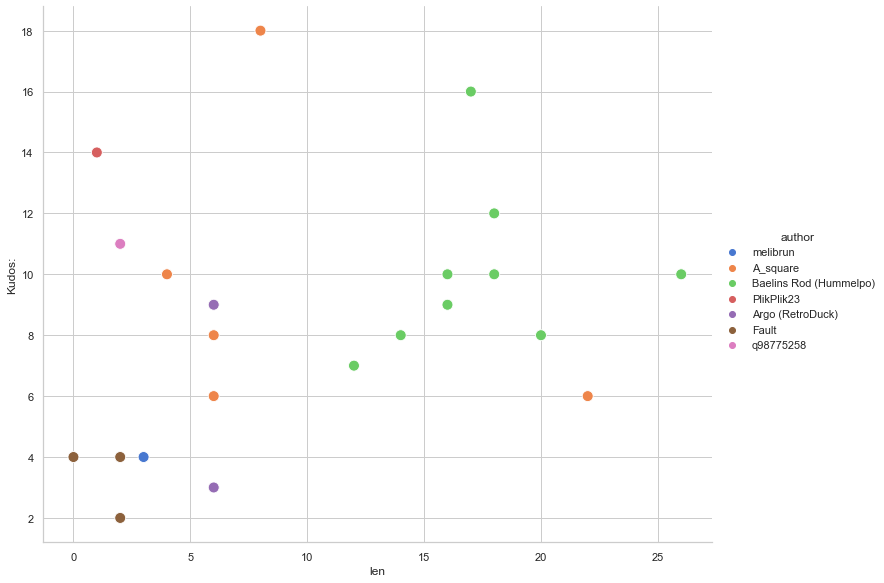

In [15]:
word = sb.relplot(x="len", y="Kudos:", hue="author", data=df_tags, height=8.27, aspect=9/7.27, s = 120)

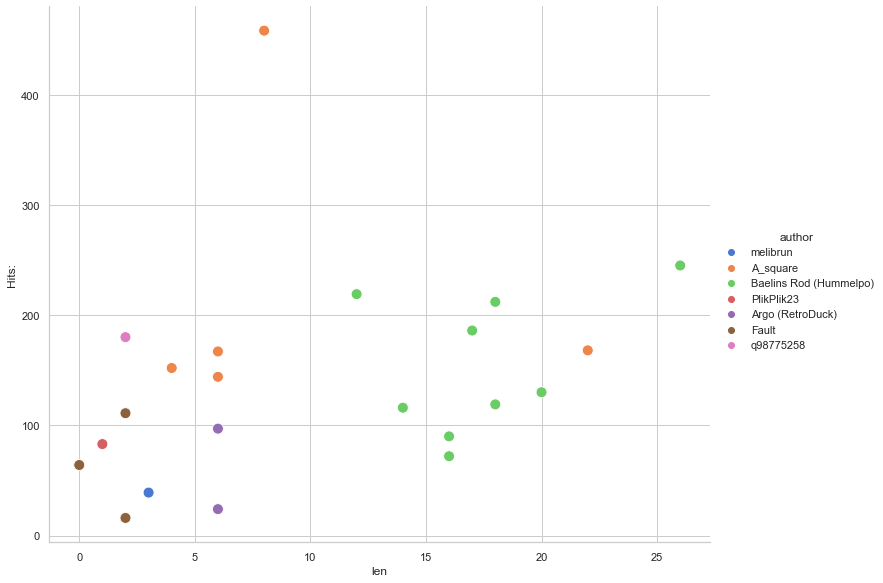

In [16]:
word = sb.relplot(x="len", y="Hits:", hue="author", data=df_tags, height=8.27, aspect=9/7.27, s = 120)

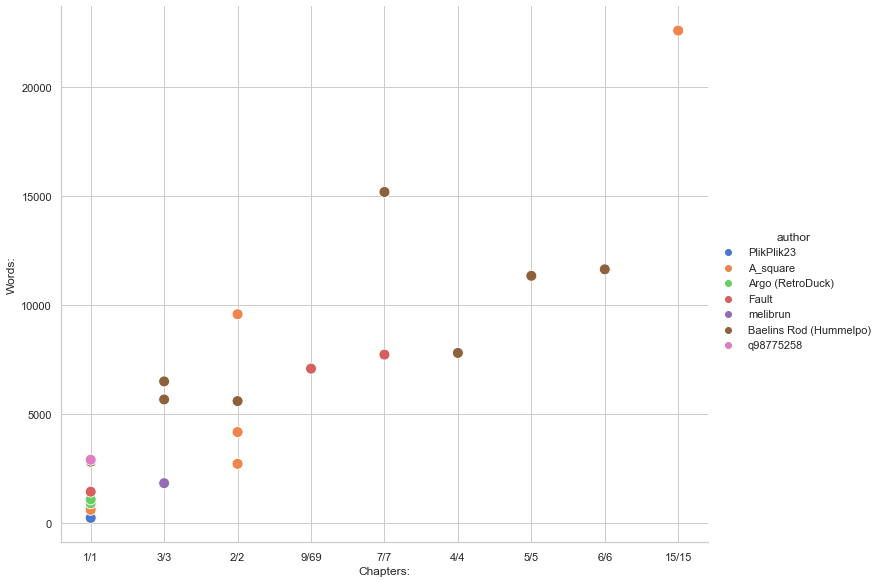

In [17]:
df_sort_word = df.sort_values(by=["Words:"])
word = sb.relplot(x="Chapters:", y="Words:", hue="author", data=df_sort_word, height=8.27, aspect=9/7.27, s = 120)

### Количество лайков от количества слов по разным авторам 

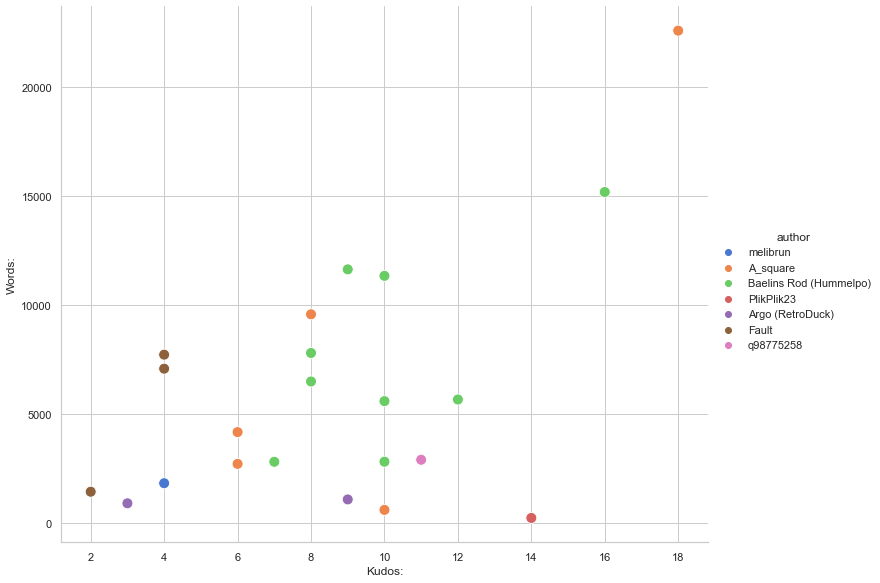

In [18]:
sb.relplot(x="Kudos:", y="Words:", hue="author", data=df, height=8.27, aspect=9/7.27, s = 120)

### Просмотры и лайки

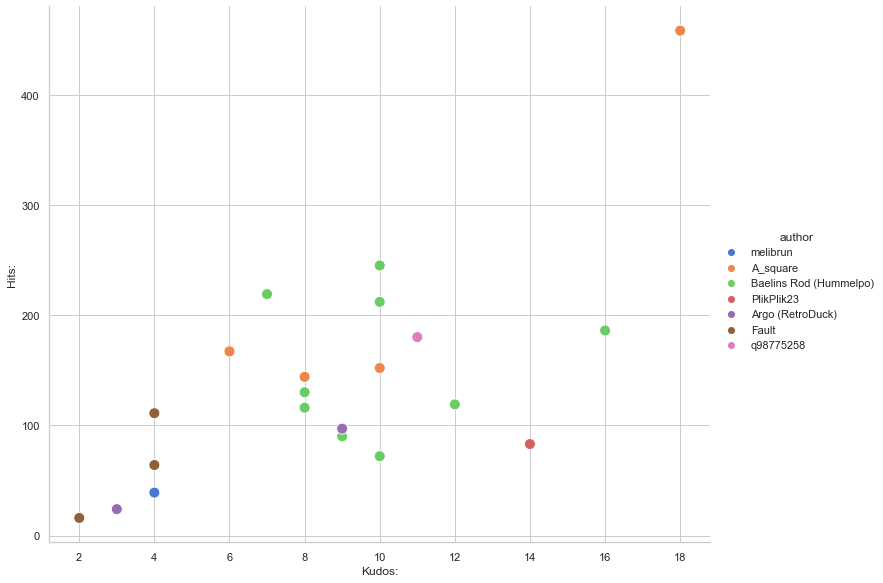

In [19]:
sb.relplot(x="Kudos:", y="Hits:", hue="author", data=df, height=8.27, aspect=9/7.27, s = 120)

### Лайки и комментарии (не зависят)

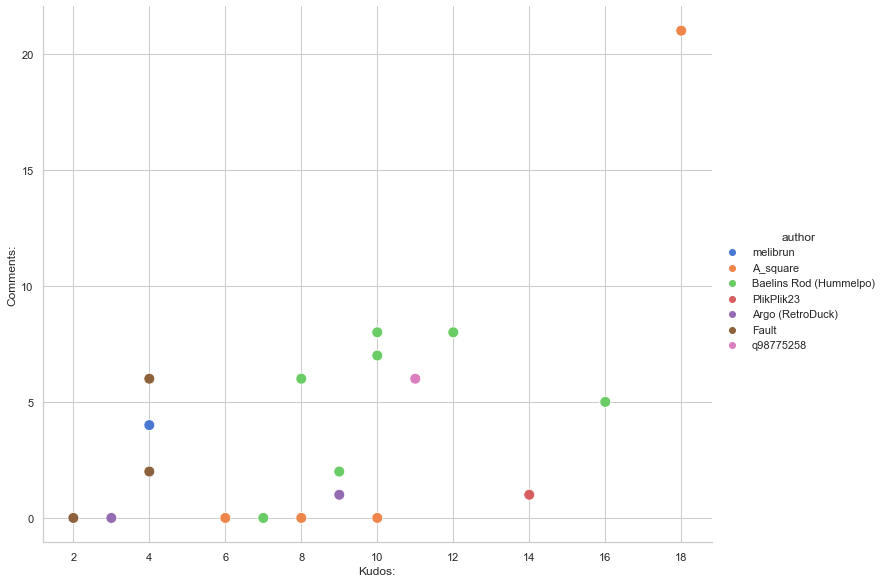

In [20]:
sb.relplot(x="Kudos:", y="Comments:", hue="author", data=df, height=8.27, aspect=9/7.27, s = 120)

### гистограммы

In [22]:
sb.set(rc={'figure.figsize':(11.7,8.27)})

слова (ненормально)

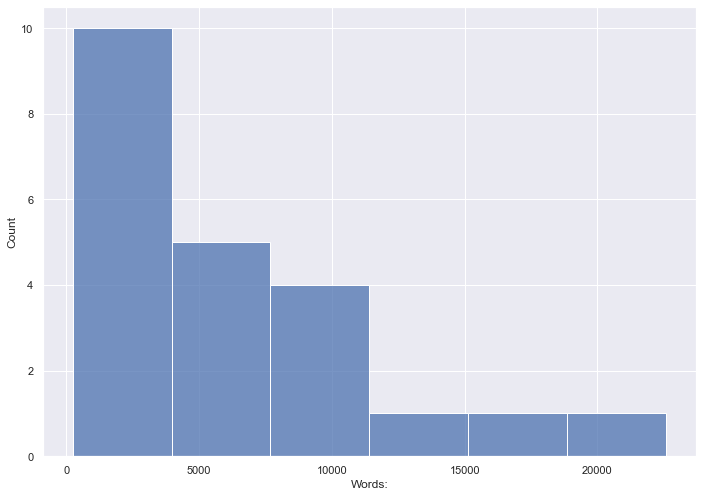

In [23]:
r = sb.histplot(data=df_sort_word, x="Words:")


лайки (тоже ненормально!)

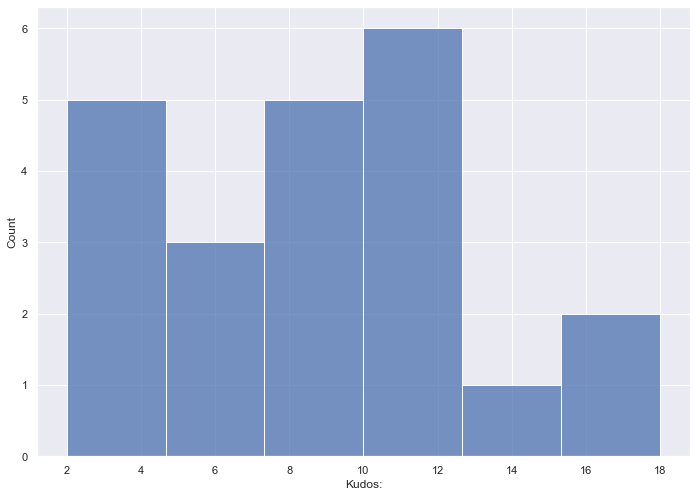

In [24]:
r = sb.histplot(df, x = "Kudos:")

у большинства комментариев нет(

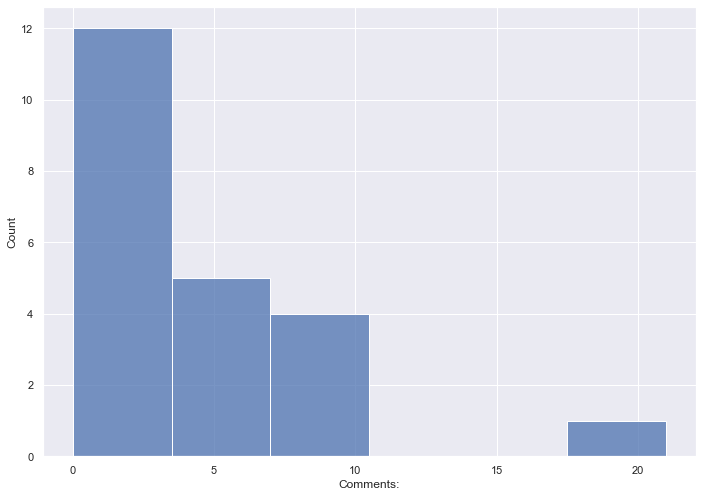

In [25]:
r = sb.histplot(df, x = "Comments:")

Количество просмотров

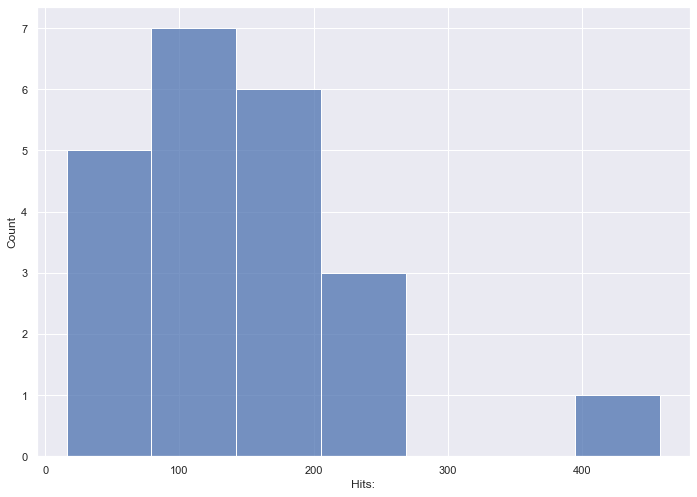

In [26]:
r = sb.histplot(df, x = "Hits:")

заметка - количество просмотров от времени появления на сайте до времени анализа (выявим ботов, ха-ха-ха!)

## Категориальные данные

отношения

In [27]:
df_rel = df.explode("relationships")

In [28]:
pd.unique(df_rel["relationships"])

array([nan])

<AxesSubplot:xlabel='Kudos:', ylabel='relationships'>

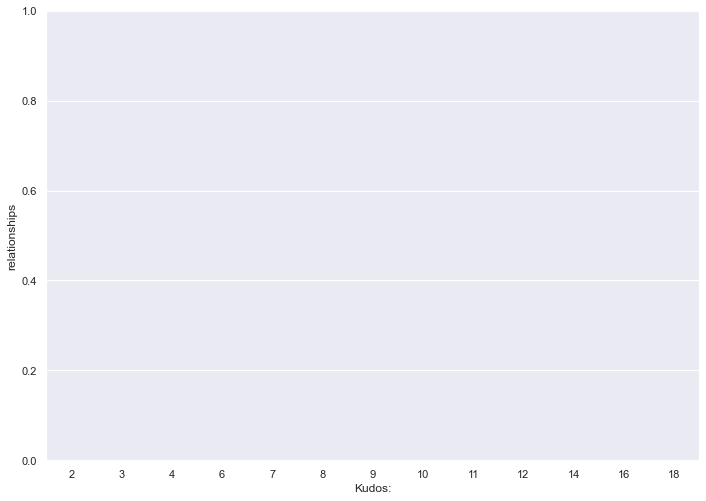

In [29]:
sb.boxplot(x="Kudos:", y="relationships", data=df_rel)

персонажи

In [30]:
df_char = df.explode("characters")


<AxesSubplot:xlabel='Kudos:', ylabel='characters'>

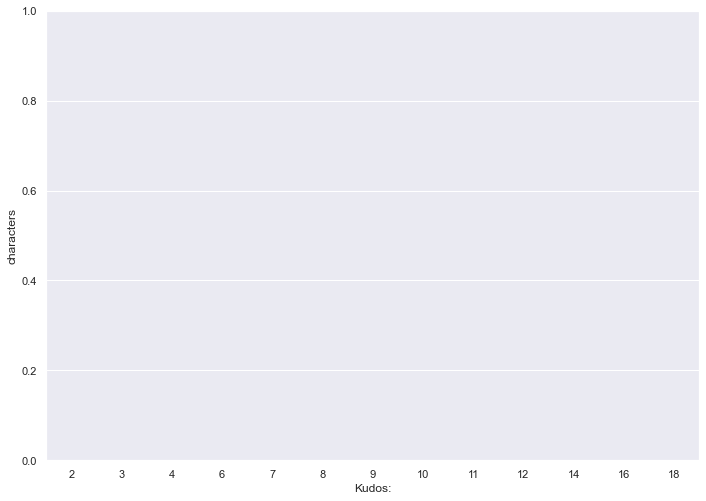

In [31]:
sb.boxplot(x="Kudos:", y="characters", data=df_char)

теги

## корелляция

In [80]:
correlation = df_tags[["Kudos:", "Hits:", "Words:", "Comments:", "len", "Bookmarks:"]].corr()

In [86]:
sb.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:>

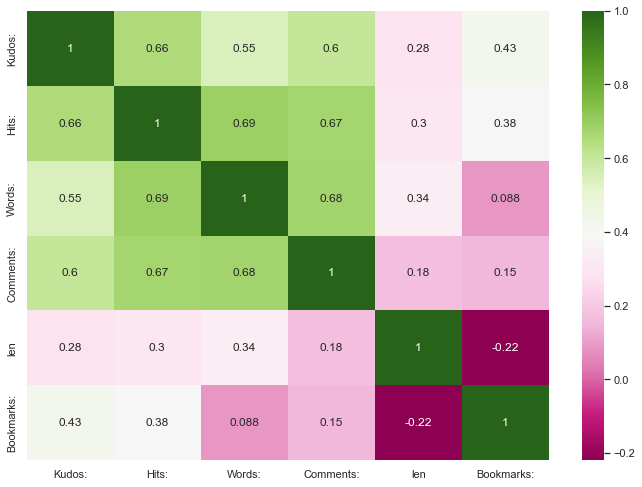

In [87]:
sb.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap="PiYG", annot=True  )

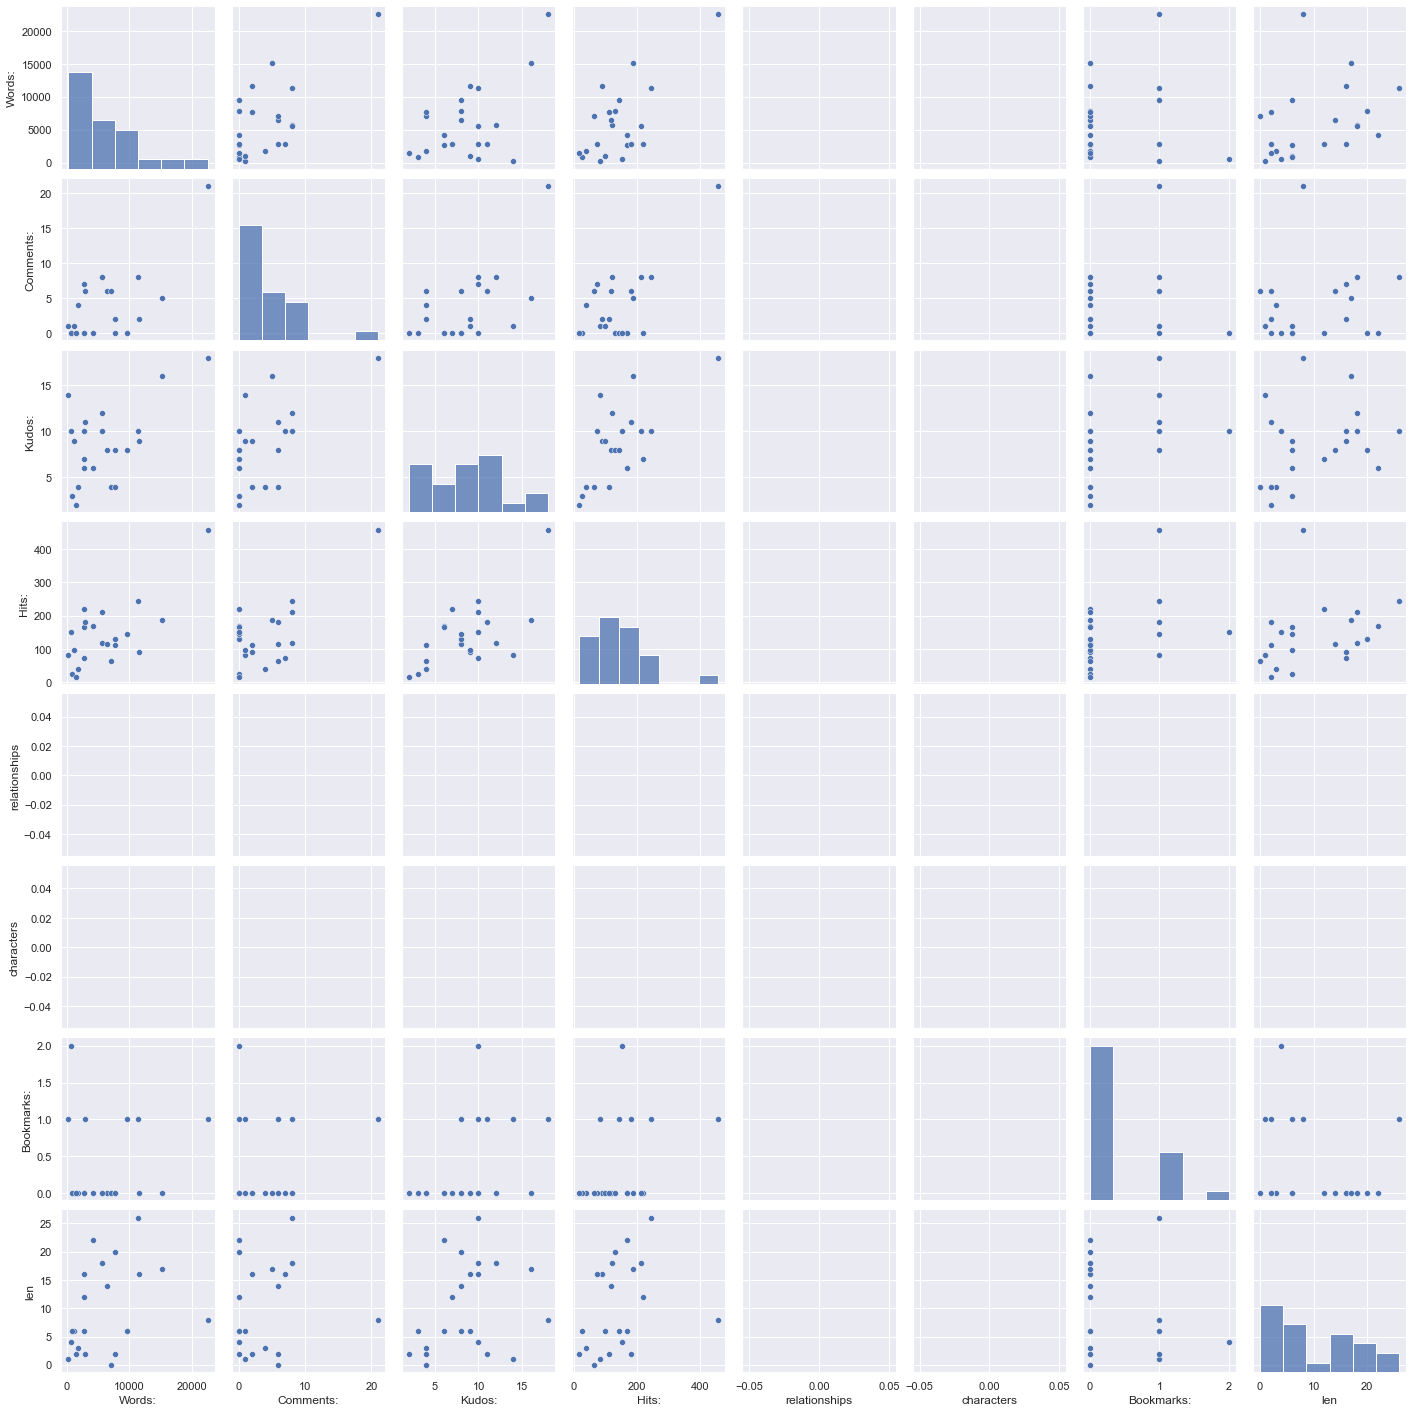

In [50]:
sb.pairplot(df_tags)

In [32]:
df_tag = df.explode("tags_add")

In [33]:
sb.set(rc={'figure.figsize':(11,80)})

<AxesSubplot:xlabel='Hits:', ylabel='tags_add'>

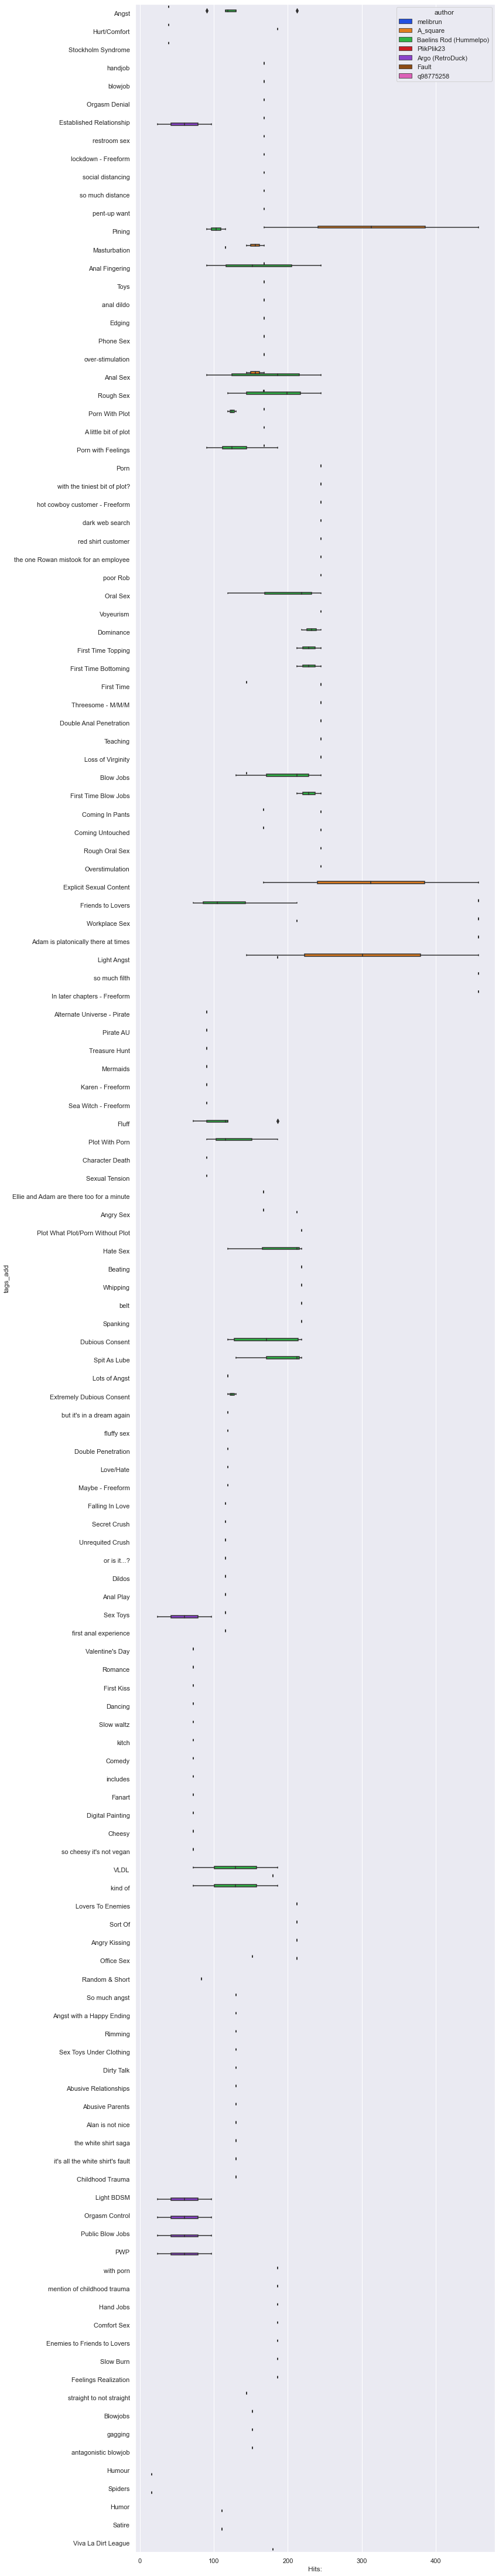

In [34]:
sb.boxplot(x="Hits:", y="tags_add", hue = "author", data=df_tag, palette="bright")

<AxesSubplot:xlabel='Kudos:', ylabel='tags_add'>

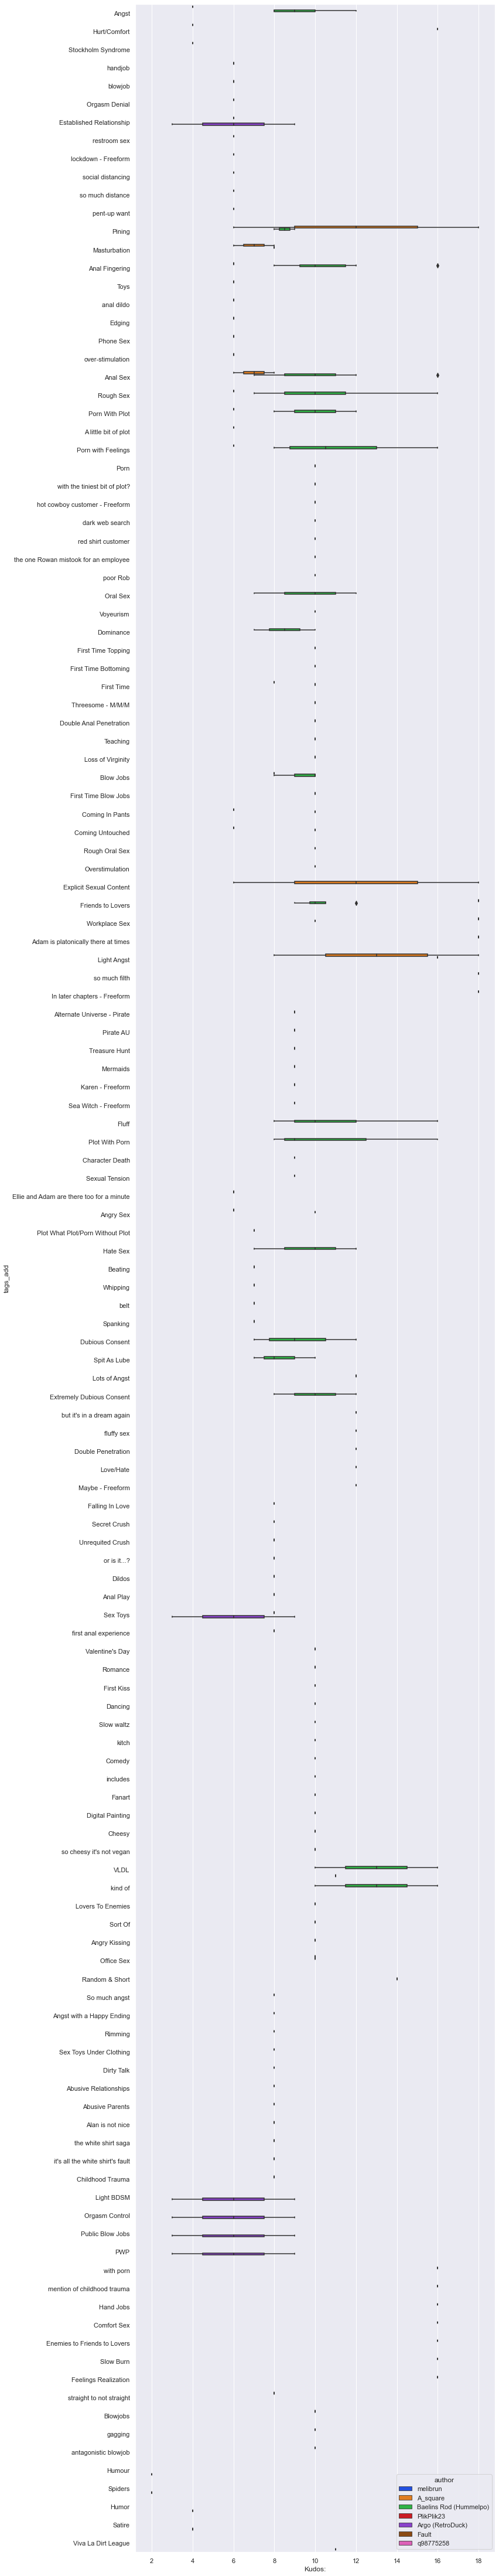

In [35]:
sb.boxplot(x="Kudos:", y="tags_add", hue = "author", data=df_tag, palette="bright")

In [36]:
df["full_text"].describe()

count                                                    22
unique                                                   22
top       ;Okay, that's enough. That's enough. Alan has ...
freq                                                      1
Name: full_text, dtype: object

In [37]:
sb.set(rc={'figure.figsize':(25,10)})

In [38]:
sb.set(rc={'figure.figsize':(45,10)})

In [39]:
import numpy as np

<AxesSubplot:xlabel='author', ylabel='tags_add'>

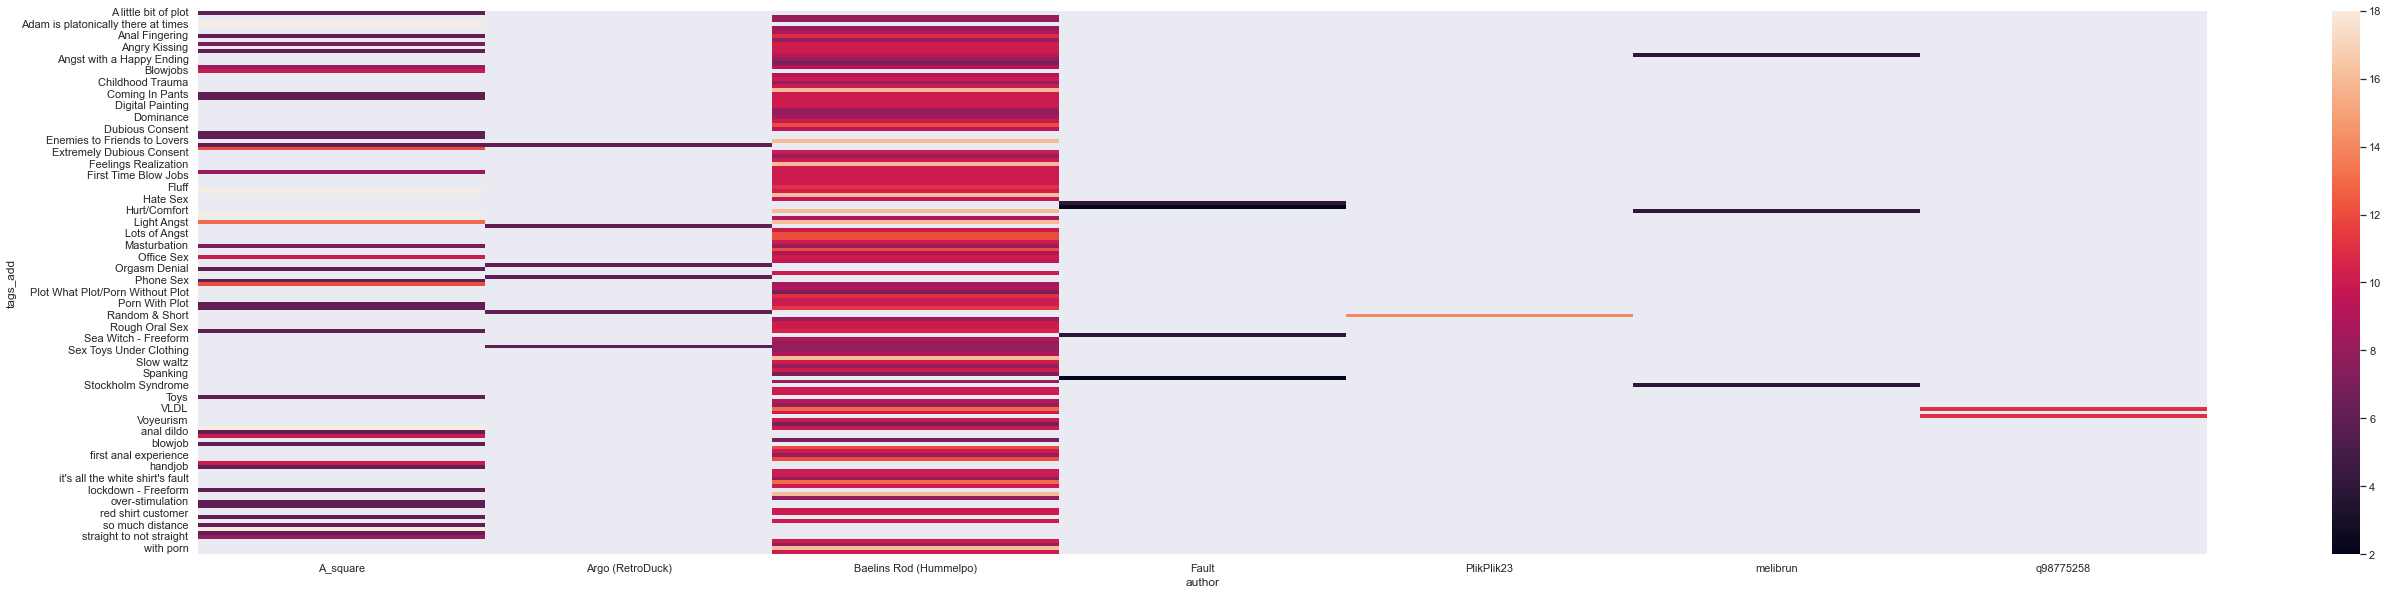

In [40]:
pivot = df_tag.pivot_table(
    index=["tags_add"],
    columns=["author"],
    values="Kudos:",
    aggfunc=np.average)
sb.heatmap(pivot)

<AxesSubplot:xlabel='author', ylabel='tags_add'>

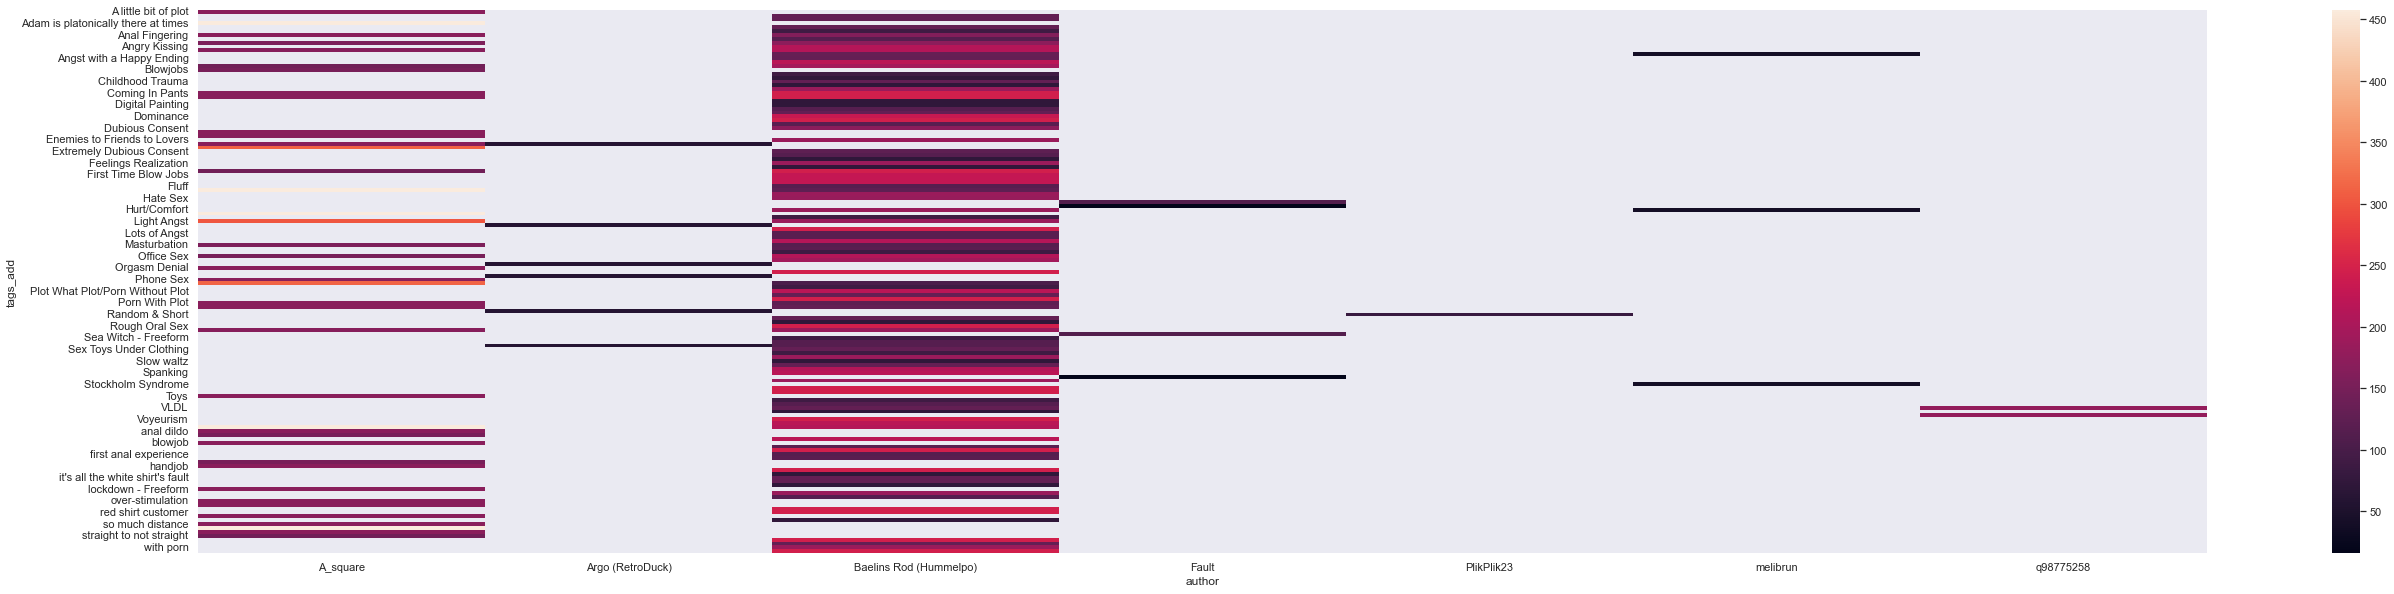

In [41]:
pivot = df_tag.pivot_table(
    index=["tags_add"],
    columns=["author"],
    values="Hits:",
    aggfunc=np.average)
sb.heatmap(pivot)

тег - читаемость, попытки

In [42]:
sb.relplot(x="Hits:", y="tags_add", hue="author", data=df_tag, height=15.27, aspect=9/7.27, s = 60)

Error in callback <function flush_figures at 0x000002765F827430> (for post_execute):


KeyboardInterrupt: 

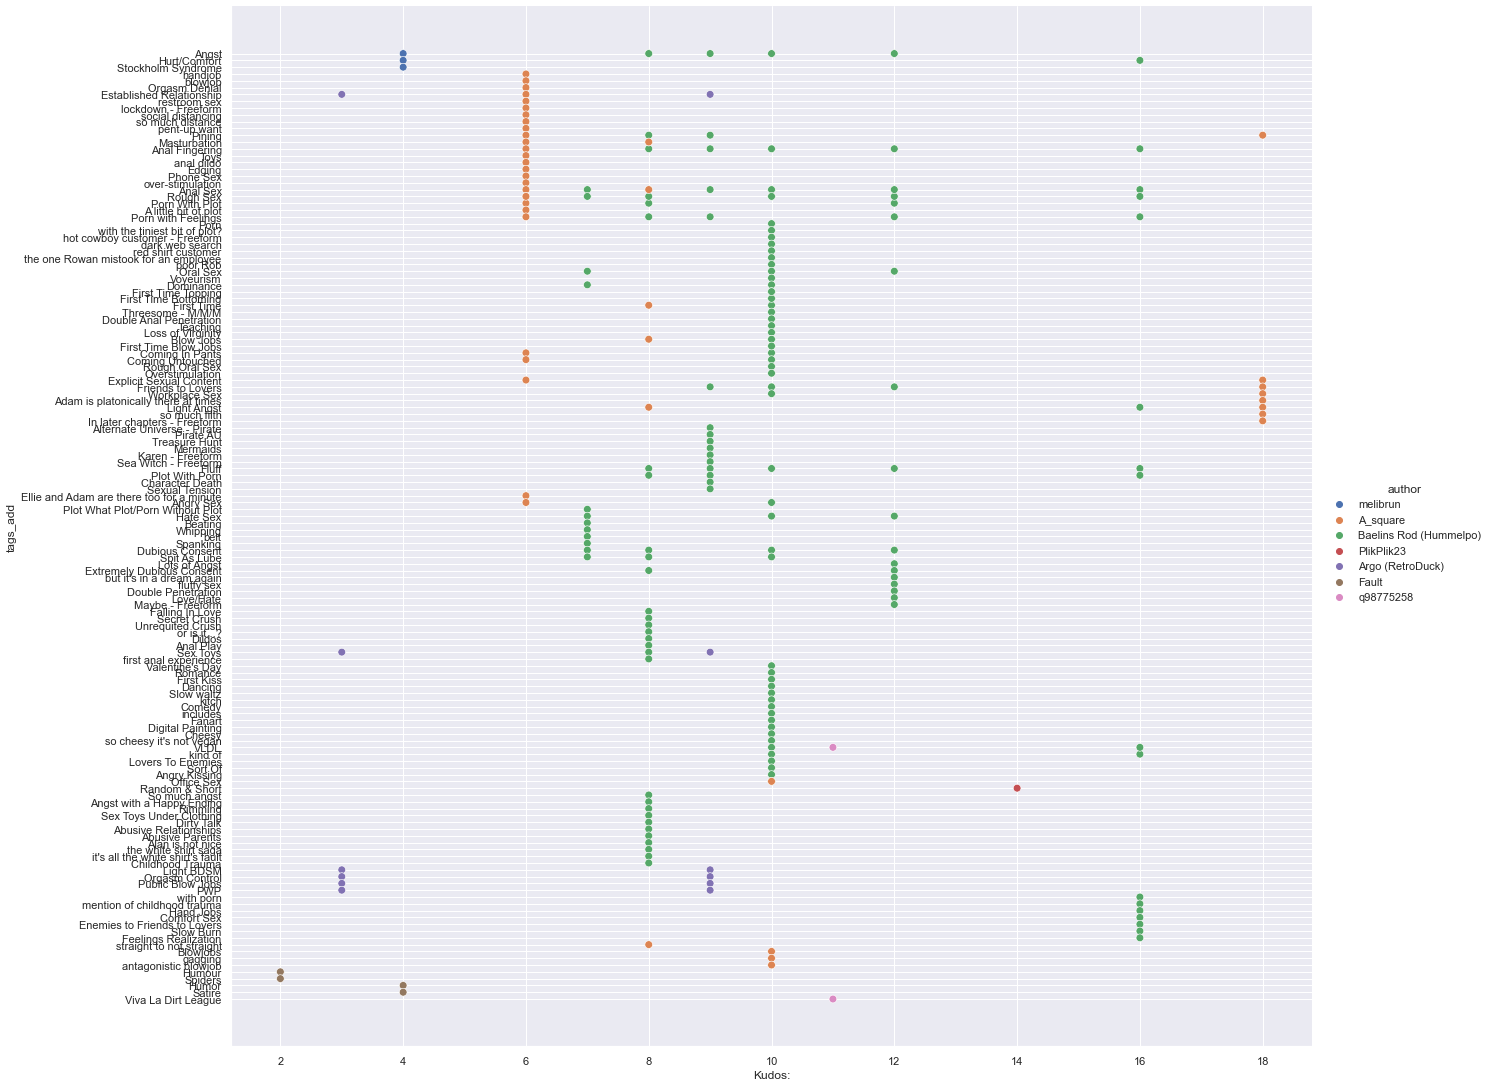

In [ ]:
sb.relplot(x="Kudos:", y="tags_add", hue="author", data=df_tag, height=15.27, aspect=9/7.27, s = 60)

<AxesSubplot:ylabel='None'>

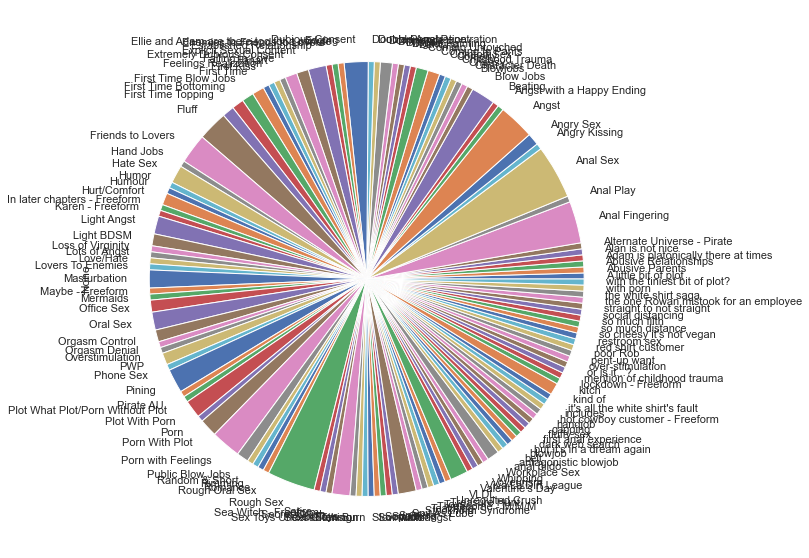

In [ ]:
df_tag.groupby("tags_add").size().plot(kind = "pie")

# ТЕКСТ ХЕРО

In [ ]:
import texthero as hero

In [ ]:
import plotly.express as px

In [ ]:
df_full_txt = df
df_full_txt

id                  author  \
0   work_40717614                melibrun   
1   work_39345489                A_square   
2   work_39200592  Baelins Rod (Hummelpo)   
3   work_36631768                A_square   
4   work_38353909  Baelins Rod (Hummelpo)   
5   work_37915759                A_square   
6   work_37878532  Baelins Rod (Hummelpo)   
7   work_37560283  Baelins Rod (Hummelpo)   
8   work_37419091  Baelins Rod (Hummelpo)   
9   work_37124503  Baelins Rod (Hummelpo)   
10  work_37093465  Baelins Rod (Hummelpo)   
11  work_37006072              PlikPlik23   
12  work_36970639  Baelins Rod (Hummelpo)   
13  work_36933667        Argo (RetroDuck)   
14  work_36932701        Argo (RetroDuck)   
15  work_36905911  Baelins Rod (Hummelpo)   
16  work_35945272                A_square   
17  work_35659282                A_square   
18  work_34926301                   Fault   
19  work_32044834                   Fault   
20  work_31522973                   Fault   
21  work_27261451               q98775258   

                                               title  Language:  Words:  \
0                   One-mississippi, two-mississippi    English    1829   
1                                        Locked Down    English    4173   
2   I'll be your teacher, I'll show you the ropes...    English   11340   
3                                  Not Bored Anymore    English   22586   
4             Four peasants on a dead man's chest...    English   11637   
5                                          Annoyance    English    2716   
6                                         "Whiplash"    English    2812   
7                             Learn to love again...    English    5668   
8                               When I First Met You    English    6495   
9                       ❤️Will you be my Alantine?❤️    English    2816   
10                                      Give Or Take    English    5593   
11                     VLDL: Epilogues and Addendums    English     236   
12                                  The White Menace    English    7802   
13                                     Under control    English    1085   
14                                     Под контролем    Русский     907   
15                           A Bored Christmas Carol    English   15185   
16                                   Merry Christmas    English    9577   
17                                    Borrowing Pens    English     605   
18                   The Janitor in the Shelobratory    English    1438   
19                                The Taika Takeover    English    7082   
20                Keanu Reeves,  Playtech consultant    English    7725   
21                                             饮酒需适量  中文-普通话 國語    2904   

   Chapters:  Comments:  Kudos:  Hits:  relationships  characters  \
0        3/3          4       4     39            NaN         NaN   
1        2/2          0       6    168            NaN         NaN   
2        5/5          8      10    244            NaN         NaN   
3      15/15         21      18    457            NaN         NaN   
4        6/6          2       9     90            NaN         NaN   
5        2/2          0       6    167            NaN         NaN   
6        1/1          0       7    219            NaN         NaN   
7        3/3          8      12    119            NaN         NaN   
8        3/3          6       8    116            NaN         NaN   
9        1/1          7      10     72            NaN         NaN   
10       2/2          8      10    212            NaN         NaN   
11       1/1          1      14     83            NaN         NaN   
12       4/4          0       8    129            NaN         NaN   
13       1/1          1       9     97            NaN         NaN   
14       1/1          0       3     24            NaN         NaN   
15       7/7          5      16    186            NaN         NaN   
16       2/2          0       8    143            NaN         NaN   
17       1/

In [ ]:
df_full_txt["full_text_clean"]=hero.remove_punctuation(df_full_txt["full_text"])

In [ ]:
df_full_txt["full_text_clean1"]=hero.clean(df_full_txt["full_text"])

# работа с текстом

любимые слова у всех

In [ ]:
px.bar(hero.visualization.top_words(df_full_txt["full_text_clean1"]).head(10))

In [ ]:
df_full_txt['tfidf'] = (
    hero.tfidf(df_full_txt['full_text_clean1'], max_features=100)
)


In [ ]:
texthero.scatterplot(
    df_full_txt, 
    'pca', 
    color='author', 
)

стиль разных авторов

In [ ]:
df_full_txt['pca'] = (
   df_full_txt['full_text']
   .pipe(texthero.clean)
   .pipe(texthero.tfidf)
   .pipe(texthero.pca)
)
texthero.scatterplot(df_full_txt, 'pca', color="author")

любимые слова разных авторов

In [ ]:
NUM_TOP_WORDS = 5
df_auth = df_full_txt.groupby('author')['full_text_clean1'].apply(lambda x: texthero.top_words(x)[:NUM_TOP_WORDS ])

облако слов

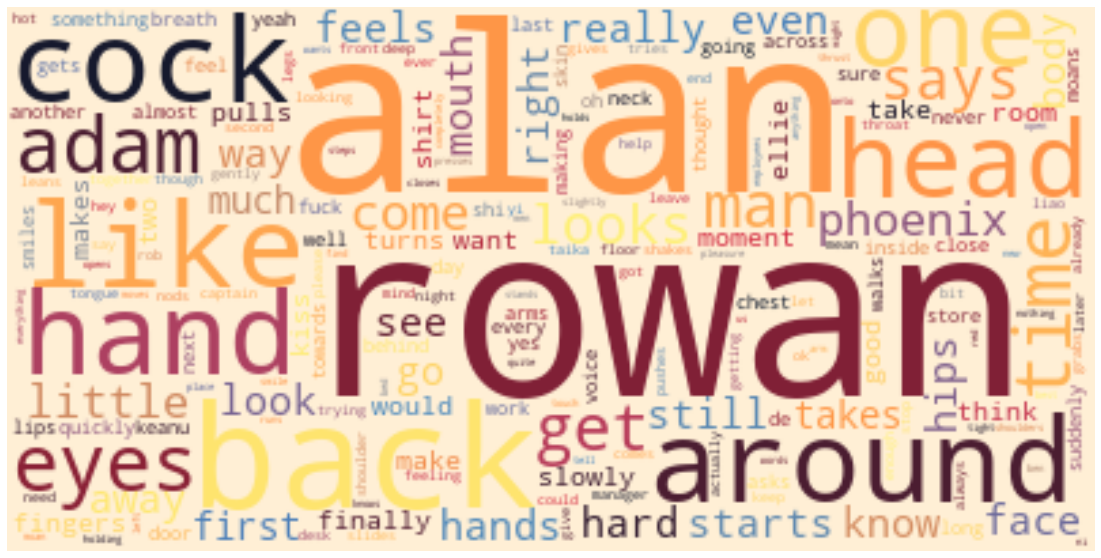

In [ ]:
c = texthero.wordcloud(df_full_txt["full_text_clean1"])


In [ ]:
from newspaper import article

полярность текста

In [ ]:
import textblob

In [ ]:
from textblob import TextBlob

In [ ]:
df_full_txt

id                  author  \
0   work_40717614                melibrun   
1   work_39345489                A_square   
2   work_39200592  Baelins Rod (Hummelpo)   
3   work_36631768                A_square   
4   work_38353909  Baelins Rod (Hummelpo)   
5   work_37915759                A_square   
6   work_37878532  Baelins Rod (Hummelpo)   
7   work_37560283  Baelins Rod (Hummelpo)   
8   work_37419091  Baelins Rod (Hummelpo)   
9   work_37124503  Baelins Rod (Hummelpo)   
10  work_37093465  Baelins Rod (Hummelpo)   
11  work_37006072              PlikPlik23   
12  work_36970639  Baelins Rod (Hummelpo)   
13  work_36933667        Argo (RetroDuck)   
14  work_36932701        Argo (RetroDuck)   
15  work_36905911  Baelins Rod (Hummelpo)   
16  work_35945272                A_square   
17  work_35659282                A_square   
18  work_34926301                   Fault   
19  work_32044834                   Fault   
20  work_31522973                   Fault   
21  work_27261451               q98775258   

                                               title  Language:  Words:  \
0                   One-mississippi, two-mississippi    English    1829   
1                                        Locked Down    English    4173   
2   I'll be your teacher, I'll show you the ropes...    English   11340   
3                                  Not Bored Anymore    English   22586   
4             Four peasants on a dead man's chest...    English   11637   
5                                          Annoyance    English    2716   
6                                         "Whiplash"    English    2812   
7                             Learn to love again...    English    5668   
8                               When I First Met You    English    6495   
9                       ❤️Will you be my Alantine?❤️    English    2816   
10                                      Give Or Take    English    5593   
11                     VLDL: Epilogues and Addendums    English     236   
12                                  The White Menace    English    7802   
13                                     Under control    English    1085   
14                                     Под контролем    Русский     907   
15                           A Bored Christmas Carol    English   15185   
16                                   Merry Christmas    English    9577   
17                                    Borrowing Pens    English     605   
18                   The Janitor in the Shelobratory    English    1438   
19                                The Taika Takeover    English    7082   
20                Keanu Reeves,  Playtech consultant    English    7725   
21                                             饮酒需适量  中文-普通话 國語    2904   

   Chapters:  Comments:  Kudos:  Hits:  \
0        3/3          4       4     39   
1        2/2          0       6    168   
2        5/5          8      10    241   
3      15/15         21      18    456   
4        6/6          2       9     89   
5        2/2          0       6    166   
6        1/1          0       7    219   
7        3/3          8      12    117   
8        3/3          6       8    115   
9        1/1          7      10     71   
10       2/2          8      10    212   
11       1/1          1      14     82   
12       4/4          0       8    127   
13       1/1          1       9     96   
14       1/1          0       3     24   
15       7/7          5      16    184   
16       2/2          0       8    143   
17       1/1          0      10    150   
18       1/1          0       2     16   
19      9/69          6       4     64   
20       7/7          2       4    110   
21       1/1          6      11    180   

                                        relationships  \
0                                        [Alan/Rowan]   
1                                        [Alan/Rowan]   
2   [Alan/Rowan, Alan/Robredshirtcustomer, Alan/Ro...   
3                                        [Alan/Rowan]   
4

In [ ]:
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [ ]:
df_full_txt["sentiment"] = df_full_txt["full_text"].apply(lambda x: sentiment(x))

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

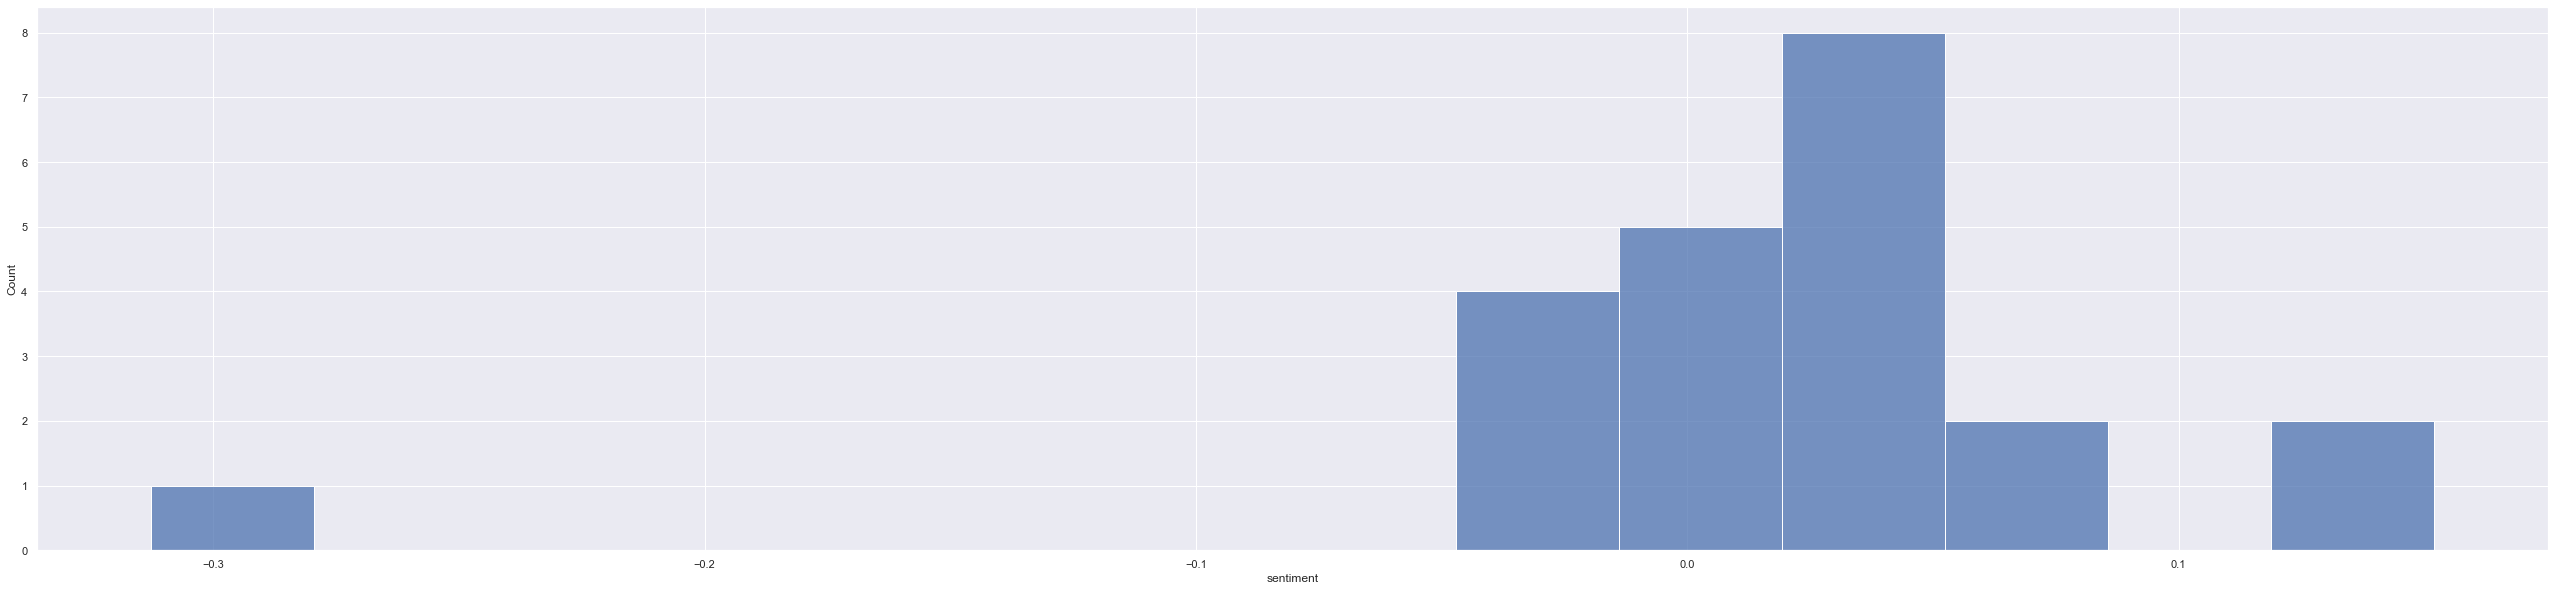

In [ ]:
sb.histplot(df_full_txt["sentiment"])

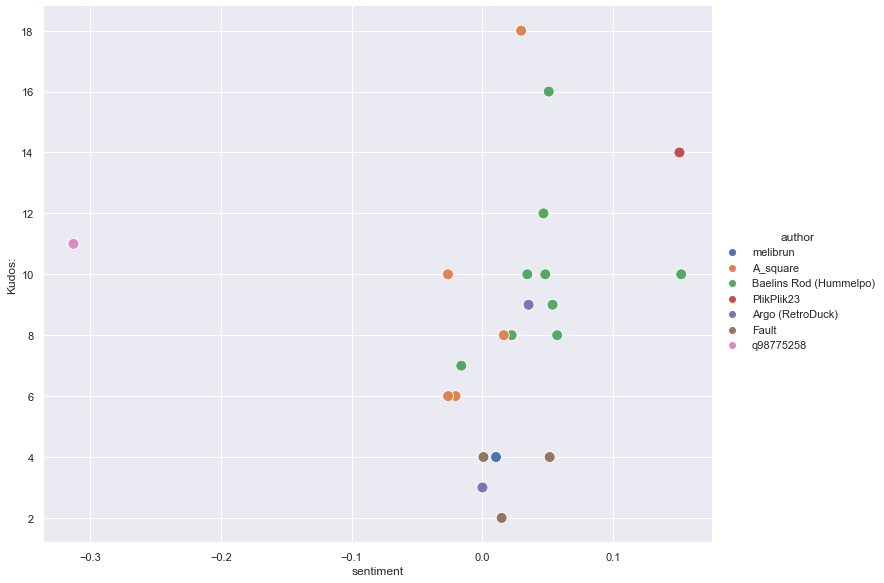

In [ ]:
sb.relplot(x="sentiment", y="Kudos:", hue="author", data=df_full_txt, height=8.27, aspect=9/7.27, s = 120)

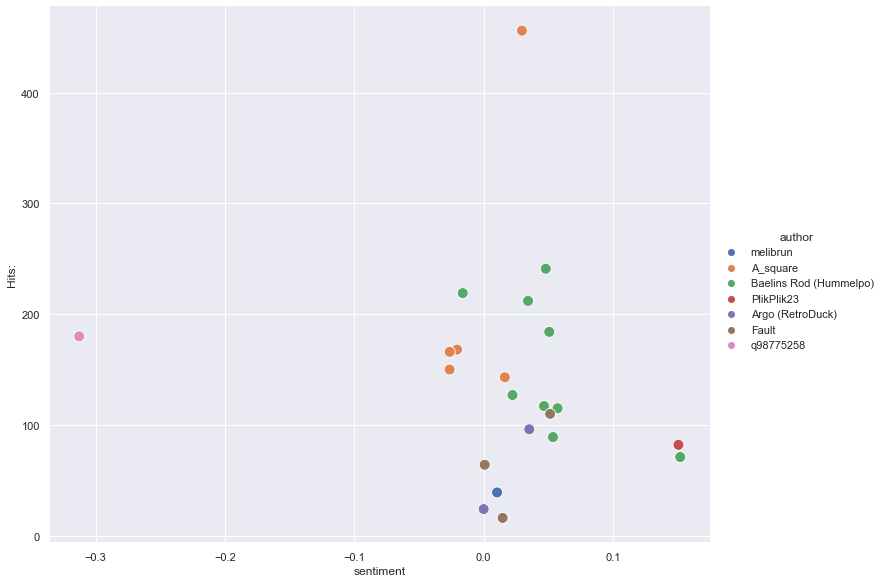

: 

In [ ]:
sb.relplot(x="sentiment", y="Hits:", hue="author", data=df_full_txt, height=8.27, aspect=9/7.27, s = 120)

In [ ]:
df_full_txt

id                  author  \
0   work_40717614                melibrun   
1   work_39345489                A_square   
2   work_39200592  Baelins Rod (Hummelpo)   
3   work_36631768                A_square   
4   work_38353909  Baelins Rod (Hummelpo)   
5   work_37915759                A_square   
6   work_37878532  Baelins Rod (Hummelpo)   
7   work_37560283  Baelins Rod (Hummelpo)   
8   work_37419091  Baelins Rod (Hummelpo)   
9   work_37124503  Baelins Rod (Hummelpo)   
10  work_37093465  Baelins Rod (Hummelpo)   
11  work_37006072              PlikPlik23   
12  work_36970639  Baelins Rod (Hummelpo)   
13  work_36933667        Argo (RetroDuck)   
14  work_36932701        Argo (RetroDuck)   
15  work_36905911  Baelins Rod (Hummelpo)   
16  work_35945272                A_square   
17  work_35659282                A_square   
18  work_34926301                   Fault   
19  work_32044834                   Fault   
20  work_31522973                   Fault   
21  work_27261451               q98775258   

                                               title  Language:  Words:  \
0                   One-mississippi, two-mississippi    English    1829   
1                                        Locked Down    English    4173   
2   I'll be your teacher, I'll show you the ropes...    English   11340   
3                                  Not Bored Anymore    English   22586   
4             Four peasants on a dead man's chest...    English   11637   
5                                          Annoyance    English    2716   
6                                         "Whiplash"    English    2812   
7                             Learn to love again...    English    5668   
8                               When I First Met You    English    6495   
9                       ❤️Will you be my Alantine?❤️    English    2816   
10                                      Give Or Take    English    5593   
11                     VLDL: Epilogues and Addendums    English     236   
12                                  The White Menace    English    7802   
13                                     Under control    English    1085   
14                                     Под контролем    Русский     907   
15                           A Bored Christmas Carol    English   15185   
16                                   Merry Christmas    English    9577   
17                                    Borrowing Pens    English     605   
18                   The Janitor in the Shelobratory    English    1438   
19                                The Taika Takeover    English    7082   
20                Keanu Reeves,  Playtech consultant    English    7725   
21                                             饮酒需适量  中文-普通话 國語    2904   

   Chapters:  Comments:  Kudos:  Hits:  \
0        3/3          4       4     39   
1        2/2          0       6    168   
2        5/5          8      10    241   
3      15/15         21      18    456   
4        6/6          2       9     89   
5        2/2          0       6    166   
6        1/1          0       7    219   
7        3/3          8      12    117   
8        3/3          6       8    115   
9        1/1          7      10     71   
10       2/2          8      10    212   
11       1/1          1      14     82   
12       4/4          0       8    127   
13       1/1          1       9     96   
14       1/1          0       3     24   
15       7/7          5      16    184   
16       2/2          0       8    143   
17       1/1          0      10    150   
18       1/1          0       2     16   
19      9/69          6       4     64   
20       7/7          2       4    110   
21       1/1          6      11    180   

                                        relationships  \
0                                        [Alan/Rowan]   
1                                        [Alan/Rowan]   
2   [Alan/Rowan, Alan/Robredshirtcustomer, Alan/Ro...   
3                                        [Alan/Rowan]   
4

# попытка в мл намбер 2

In [ ]:
import pandas as pd

In [ ]:
import texthero

In [ ]:
yaoi1 = pd.read_csv(r"C:\Users\melib\Downloads\yaoi_fics_after411.csv")
yaoi2 = pd.read_csv(r"C:\Users\melib\Downloads\yaoi_fics.csv")
yaoi = pd.concat([yaoi1, yaoi2])#это нормальный, адекватный словарь. 
not_yaoi2 = pd.read_csv(r"C:\Users\melib\Downloads\not_yaoi_fics_after39276117.csv")


## табличка with sex

надо бы сделать из этого функцию

In [ ]:
def df_from_csv_yes(name_of_old):
    name_of_new = name_of_old
    name_of_new["sex"] = "sex"
    name_of_new = name_of_new[['body', 'sex']]
    return name_of_new

def df_from_csv_no(name_of_old):
    name_of_new = name_of_old
    name_of_new["sex"] = "no"
    name_of_new = name_of_new[['body', 'sex']]
    return name_of_new

In [ ]:
yaoi_yes = df_from_csv_yes(yaoi)

In [ ]:
with open (r"C:\Users\melib\Downloads\1not_yaoi_ficsuntil39276117.csv") as not_yaoi1:
    not_yaoi11 = {}
    for line in not_yaoi1:
        h = line.split('"')
        #print(line)
        if (line[1].isdigit() == True and line[2].find(".") < 0 and line.find("Punk!") < 0):
            dot = line.split(",")[0].replace('"', "")
            not_yaoi11["work_"+dot] = ""
        else:
            not_yaoi11["work_"+dot] += line.strip()
not_yaoi11

{'work_40663875': ';;;;;;;;;;;;;;;;;;"Xue..."""" Xiao opened his window quickly, closing it right after Xue climbed in.";;;;;;;;;;;;;;;;;;;;;;;;"Hey. It\'s been a while, hasn\'t it.""""";;;;;;;;;;;;;;;;;;;;;;;;"It has. You haven\'t shown up in my room for a good month or two...or how long it was...""""";;;;;;;;;;;;;;;;;;;;;;;;"I had to deal with some stuff involving my parents, so that\'s why I didn\'t show up for a good minute.""""";;;;;;;;;;;;;;;;;;;;;;;;"Well, I\'m glad you\'re back. I thought you were dead...""""";;;;;;;;;;;;;;;;;;;;;;;;Xue laughs as he wrapped his arms around his lover, embracing Xiao into his presence and scent. He smelled like a nice cologne, mixing with Xiao\'s fresh laundry smell he had going on. Oh, did he miss being in one\'s arms like this.;;;;;;;;;;;;;;;;;;;;;;;;------------------;;;;;;;;;;;;;;;;;;;;;;;;They were now watching Netflix, moving from conversations to having fun with each other. Snack wrappers slightly flooded Xiao\'s desk, creating a mess but 

In [ ]:
not_yaoi111 = pd.DataFrame(list(not_yaoi11.items()), columns=["work", "body"])
not_yaoi111

work                                               body
0    work_40663875  ;;;;;;;;;;;;;;;;;;"Xue..."""" Xiao opened his ...
1    work_40771434  ;;;;;;;;;;;;;;;;;;"...Nam-ra, can you tell whe...
2    work_36467434  ;;;;;;The heat pills were so accessible to eve...
3    work_41240295  ;;;;;;Steve needs help with his bandages. He's...
4    work_41239194  ;;;;;;"Harry sat hunched up in an inconspicuou...
..             ...                                                ...
511  work_36830863  ;;;;;;"The Senju may not be noble,"""" Tobiram...
512  work_36824791  ;;;;;;Dipper steps out of the taxi and takes a...
513  work_36816829  Chuuya remembered looking by often, going in w...
514  work_36762451  ;;;;;;The dragon of shadows basically a God th...
515  work_37212337  ;;;;;;He cornered him in the small cell, pushi...

[516 rows x 2 columns]

In [ ]:
yaoi_not1 = df_from_csv_no(not_yaoi2)
yaoi_not = df_from_csv_no(not_yaoi111)

In [ ]:
yaoi_merged = pd.concat([yaoi_not, yaoi_yes, yaoi_not1])
yaoi_merged

body sex
0     ;;;;;;;;;;;;;;;;;;"Xue..."""" Xiao opened his ...  no
1     ;;;;;;;;;;;;;;;;;;"...Nam-ra, can you tell whe...  no
2     ;;;;;;The heat pills were so accessible to eve...  no
3     ;;;;;;Steve needs help with his bandages. He's...  no
4     ;;;;;;"Harry sat hunched up in an inconspicuou...  no
...                                                 ...  ..
2962  "As you all know, this is the fourth consecuti...  no
2963  It was a cold, dark evening in Manchester on a...  no
2964  Dave Strider, Knight of Time, woke up screamin...  no
2965  Aaron Burr considered himself to be a career d...  no
2966  "Ginny said no, for obvious reasons." Harry Po...  no

[8540 rows x 2 columns]

### итоговая перемешанная табличка

In [ ]:
yaoi_merged.sample(frac=1)

body  sex
2512  \n\n I would hurl words into this darkness and...   no
2816  "Stab me."\n\n"Wh-what?"\n\n"You heard me," Ed...  sex
283   ;;;;;;Buck writhed against his restraints as E...   no
1815  \nKirishima was sitting in the passenger seat ...   no
161   It's about a month after Ash stained Eiji's lo...   no
...                                                 ...  ...
2436  "You've done this with Sid, have you?"\n\nJohn...  sex
1184  It took Jainan a moment to remember why he fel...   no
533   \nYou felt light as you danced around the kitc...   no
1085  "Bradley?"\n\nRooster's back tensed as he hear...  sex
630   \nYamaguchi had already told him not to go to ...  sex

[8540 rows x 2 columns]

In [ ]:
yaoi_merged.to_csv("yaoi_8540.csv", sep=',')

## приравниваем выборки

In [ ]:
yaoi_size_merged = yaoi_merged

In [ ]:
sorted_df = yaoi_size_merged.sort_values(by='sex')


In [ ]:
sorted_df

body  sex
0    ;;;;;;;;;;;;;;;;;;"Xue..."""" Xiao opened his ...   no
993  Wei Ying leans forward and groans as Lan Zhan'...   no
992  Aziraphale didn't think it had been the full 6...   no
991                                       \n\n\n\n\n\n   no
990  lthough pride was a sin Crowley would be reluc...   no
..                                                 ...  ...
736  Rain tapped on the window, rhythmic and steady...  sex
735  "Lian'er, you're too old for this," his mother...  sex
734  Drifting gently out of sleep, Nicky lamented t...  sex
742  Summer--a time for festivals, fireworks, and h...  sex
184  \nI wake up in a familiar room, and I immediat...  sex

[8540 rows x 2 columns]

In [ ]:
df_dropped_last_n = sorted_df.iloc[:-1574]

In [ ]:
df_dropped_last_n["clean"] = hero.clean(df_dropped_last_n["body"])

C:\Users\melib\AppData\Local\Temp\ipykernel_19260\2042907064.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_dropped_last_n.to_csv("yaoi_6966.csv", sep=',')

## тренировка мл важно не удаляй

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_tfidf, yaoi_merged["sex"], test_size=0.2, random_state=7)


In [ ]:
num_folds = 10
n_estimators = 100
scoring = 'accuracy'

In [ ]:

models = []
#models.append(('RF', RandomForestClassifier(n_estimators=n_estimators)))
models.append(('LSVC', LinearSVC())) #будет длиться бесконечно 
#models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB())) 
#models.append(('LSVC', LinearSVC()))
models.append(('SVC', SVC())) #будет длиться бесконечно
models.append(('MLP', MLPClassifier())) 
models.append(('BG', BaggingClassifier(n_estimators=n_estimators)))
models.append(('RF', RandomForestClassifier(n_estimators=n_estimators)))
models.append(('ET', ExtraTreesClassifier(n_estimators=n_estimators)))
models.append(('AB', AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME')))
models.append(('GB', GradientBoostingClassifier(n_estimators=n_estimators)))

LR: train = 0.878 (0.014) / test = 0.889  
KNN: train = 0.662 (0.016) / test = 0.667  
CART: train = 0.917 (0.009) / test = 0.923  
Byes: train = 0.746 (0.024) / test = 0.757  
LSVC: train = 0.923 (0.011) / test = 0.927  
RF: train = 0.934 (0.010) / test = 0.947  


In [ ]:
scores = []
names = []
results = []
predictions = []
msg_row = []
seed = 7
#for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    names.append(name)
    results.append(cv_results)
    m_fit = model.fit(X_train, Y_train)
    m_predict = model.predict(X_test)
    predictions.append(m_predict)
    m_score = model.score(X_test, Y_test)
    scores.append(m_score)
    msg = "%s: train = %.3f (%.3f) / test = %.3f" % (name, cv_results.mean(), cv_results.std(), m_score)
    msg_row.append(msg)
    print(msg)

RF: train = 0.934 (0.010) / test = 0.947
LSVC: train = 0.923 (0.011) / test = 0.927
LR: train = 0.878 (0.014) / test = 0.889


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\melib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\melib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py", line 550, in fit
    X, y = self._validate_data(
  File "C:\Users\melib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\melib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\melib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py", line 822, in check_array
    array = _ensure_sparse_format(
  File "C:\Users\melib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py", line 512, in _ensure_sparse_format
    raise TypeError(
TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# ПОЛУЧИЛОСЬ

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier()),
])

In [ ]:
text_clf.fit(df_dropped_last_n["clean"], df_dropped_last_n["sex"])

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])

In [ ]:
predicted = text_clf.predict(df_full_txt['full_text_clean1'])


In [ ]:
predicted

array(['no', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'no',
       'sex', 'no', 'sex', 'sex', 'sex', 'sex', 'sex', 'sex', 'no', 'no',
       'no', 'sex'], dtype=object)

In [ ]:
df_full_txt["sex_or_no"] = predicted

In [ ]:
import seaborn as sb

In [ ]:
df_full_txt

id                  author  \
0   work_40717614                melibrun   
1   work_39345489                A_square   
2   work_39200592  Baelins Rod (Hummelpo)   
3   work_36631768                A_square   
4   work_38353909  Baelins Rod (Hummelpo)   
5   work_37915759                A_square   
6   work_37878532  Baelins Rod (Hummelpo)   
7   work_37560283  Baelins Rod (Hummelpo)   
8   work_37419091  Baelins Rod (Hummelpo)   
9   work_37124503  Baelins Rod (Hummelpo)   
10  work_37093465  Baelins Rod (Hummelpo)   
11  work_37006072              PlikPlik23   
12  work_36970639  Baelins Rod (Hummelpo)   
13  work_36933667        Argo (RetroDuck)   
14  work_36932701        Argo (RetroDuck)   
15  work_36905911  Baelins Rod (Hummelpo)   
16  work_35945272                A_square   
17  work_35659282                A_square   
18  work_34926301                   Fault   
19  work_32044834                   Fault   
20  work_31522973                   Fault   
21  work_27261451               q98775258   

                                               title  Language:  Words:  \
0                   One-mississippi, two-mississippi    English    1829   
1                                        Locked Down    English    4173   
2   I'll be your teacher, I'll show you the ropes...    English   11340   
3                                  Not Bored Anymore    English   22586   
4             Four peasants on a dead man's chest...    English   11637   
5                                          Annoyance    English    2716   
6                                         "Whiplash"    English    2812   
7                             Learn to love again...    English    5668   
8                               When I First Met You    English    6495   
9                       ❤️Will you be my Alantine?❤️    English    2816   
10                                      Give Or Take    English    5593   
11                     VLDL: Epilogues and Addendums    English     236   
12                                  The White Menace    English    7802   
13                                     Under control    English    1085   
14                                     Под контролем    Русский     907   
15                           A Bored Christmas Carol    English   15185   
16                                   Merry Christmas    English    9577   
17                                    Borrowing Pens    English     605   
18                   The Janitor in the Shelobratory    English    1438   
19                                The Taika Takeover    English    7082   
20                Keanu Reeves,  Playtech consultant    English    7725   
21                                             饮酒需适量  中文-普通话 國語    2904   

   Chapters:  Comments:  Kudos:  Hits:  relationships  characters  \
0        3/3          4       4     39            NaN         NaN   
1        2/2          0       6    168            NaN         NaN   
2        5/5          8      10    244            NaN         NaN   
3      15/15         21      18    457            NaN         NaN   
4        6/6          2       9     90            NaN         NaN   
5        2/2          0       6    167            NaN         NaN   
6        1/1          0       7    219            NaN         NaN   
7        3/3          8      12    119            NaN         NaN   
8        3/3          6       8    116            NaN         NaN   
9        1/1          7      10     72            NaN         NaN   
10       2/2          8      10    212            NaN         NaN   
11       1/1          1      14     83            NaN         NaN   
12       4/4          0       8    129            NaN         NaN   
13       1/1          1       9     97            NaN         NaN   
14       1/1          0       3     24            NaN         NaN   
15       7/7          5      16    186            NaN         NaN   
16       2/2          0       8    143            NaN         NaN   
17       1/

### график пацаны у нас есть график

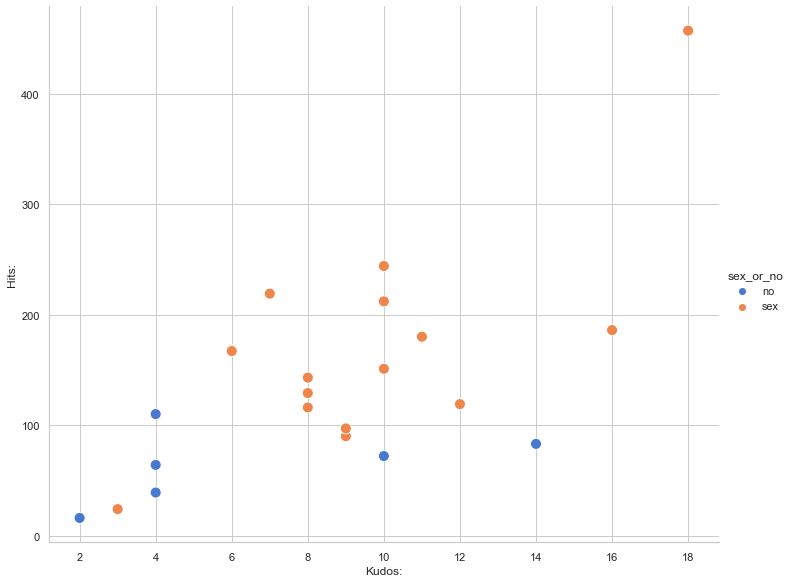

In [ ]:
word = sb.relplot(x="Kudos:", y="Hits:", hue="sex_or_no", data=df_full_txt, height=8.27, aspect=9/7.27, s = 120)

In [ ]:
df_name_author=df_full_txt[["author", "title", "sex_or_no"]]

In [ ]:
df_name_author

author                                             title  \
0                 melibrun                  One-mississippi, two-mississippi   
1                 A_square                                       Locked Down   
2   Baelins Rod (Hummelpo)  I'll be your teacher, I'll show you the ropes...   
3                 A_square                                 Not Bored Anymore   
4   Baelins Rod (Hummelpo)            Four peasants on a dead man's chest...   
5                 A_square                                         Annoyance   
6   Baelins Rod (Hummelpo)                                        "Whiplash"   
7   Baelins Rod (Hummelpo)                            Learn to love again...   
8   Baelins Rod (Hummelpo)                              When I First Met You   
9   Baelins Rod (Hummelpo)                      ❤️Will you be my Alantine?❤️   
10  Baelins Rod (Hummelpo)                                      Give Or Take   
11              PlikPlik23                     VLDL: Epilogues and Addendums   
12  Baelins Rod (Hummelpo)                                  The White Menace   
13        Argo (RetroDuck)                                     Under control   
14        Argo (RetroDuck)                                     Под контролем   
15  Baelins Rod (Hummelpo)                           A Bored Christmas Carol   
16                A_square                                   Merry Christmas   
17                A_square                                    Borrowing Pens   
18                   Fault                   The Janitor in the Shelobratory   
19                   Fault                                The Taika Takeover   
20                   Fault                Keanu Reeves,  Playtech consultant   
21               q98775258                                             饮酒需适量   

   sex_or_no  
0         no  
1        sex  
2        sex  
3        sex  
4        sex  
5        sex  
6        sex  
7        sex  
8        sex  
9         no  
10       sex  
11        no  
12       sex  
13       sex  
14       sex  
15       sex  
16       sex  
17       sex  
18        no  
19        no  
20        no  
21       sex